In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz
from ipywidgets import interact
from scipy import special, stats
import ipywidgets as ipyw
import time

In [7]:
az.style.use('arviz-doc')  # aplica estilo a los gráficos
np.random.seed(42)  # semilla para fijar números aleatorios
plt.rcParams['lines.linewidth'] = 3

In [8]:
def dice():
    seed = time.perf_counter_ns() # measures time with nanonsecond precision
    return seed % 6 + 1

In [9]:
def experiment(N=10000):
    sample = [dice() for _ in range(N)]
    for i in range(1,7):
        print(f'{i} {sample.count(i)/N}')

In [10]:
experiment()

1 0.3158
2 0.0
3 0.3571
4 0.0
5 0.3271
6 0.0


# Probabilities
- Assign numbers to uncertainty
- Sample space:
  - Set of all possible results for an experiment
- Probability of the event $A$ $\rightarrow$ $P(A)$
- Events are subsets of the sample space and probabilities are numbers between $0$ and $1$ associated with the possibility of those events occurring
- Probability as a measure of uncertainty is associated with the Bayesian point of view

## Conditional probability
- Probability of an event A given that an event B has occurred.
- Given two events $A$ and $B$ and $P(B) > 0$
  - $$P(A|B) = \frac{P(A,B)}{P(B)}$$
  - $P(A,B)$: Joint probability P(A $\cap$ B)

## Probability Distributions
- "List of all posibilities"

In [12]:
def dice_distrib(α, β):
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+α, n-x+β) / special.beta(α, β))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    plt.ylim(0, 1)
    plt.xticks(x, x+1)


interact(dice_distrib,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

## Discrete Random Variable
- Random Variable: Function that assigns real numbers $R$ with a sample space
- A variable is random in the sense that in each **experiment** is possible to obtain different values
- Discrete: Can take discrete values which form a countable set.
- Random variable has a list associated with each event (probability distribution). In the case of discrete random variables, its called **pmf**(probability mass function).

### Discrete Uniform Distribution
$$p(k|a,b) = \frac{1}{b-a+1} = \frac{1}{n}$$
- Equal probability to sets of values
- For values outside $[a,b]$, $p(k) = 0$.

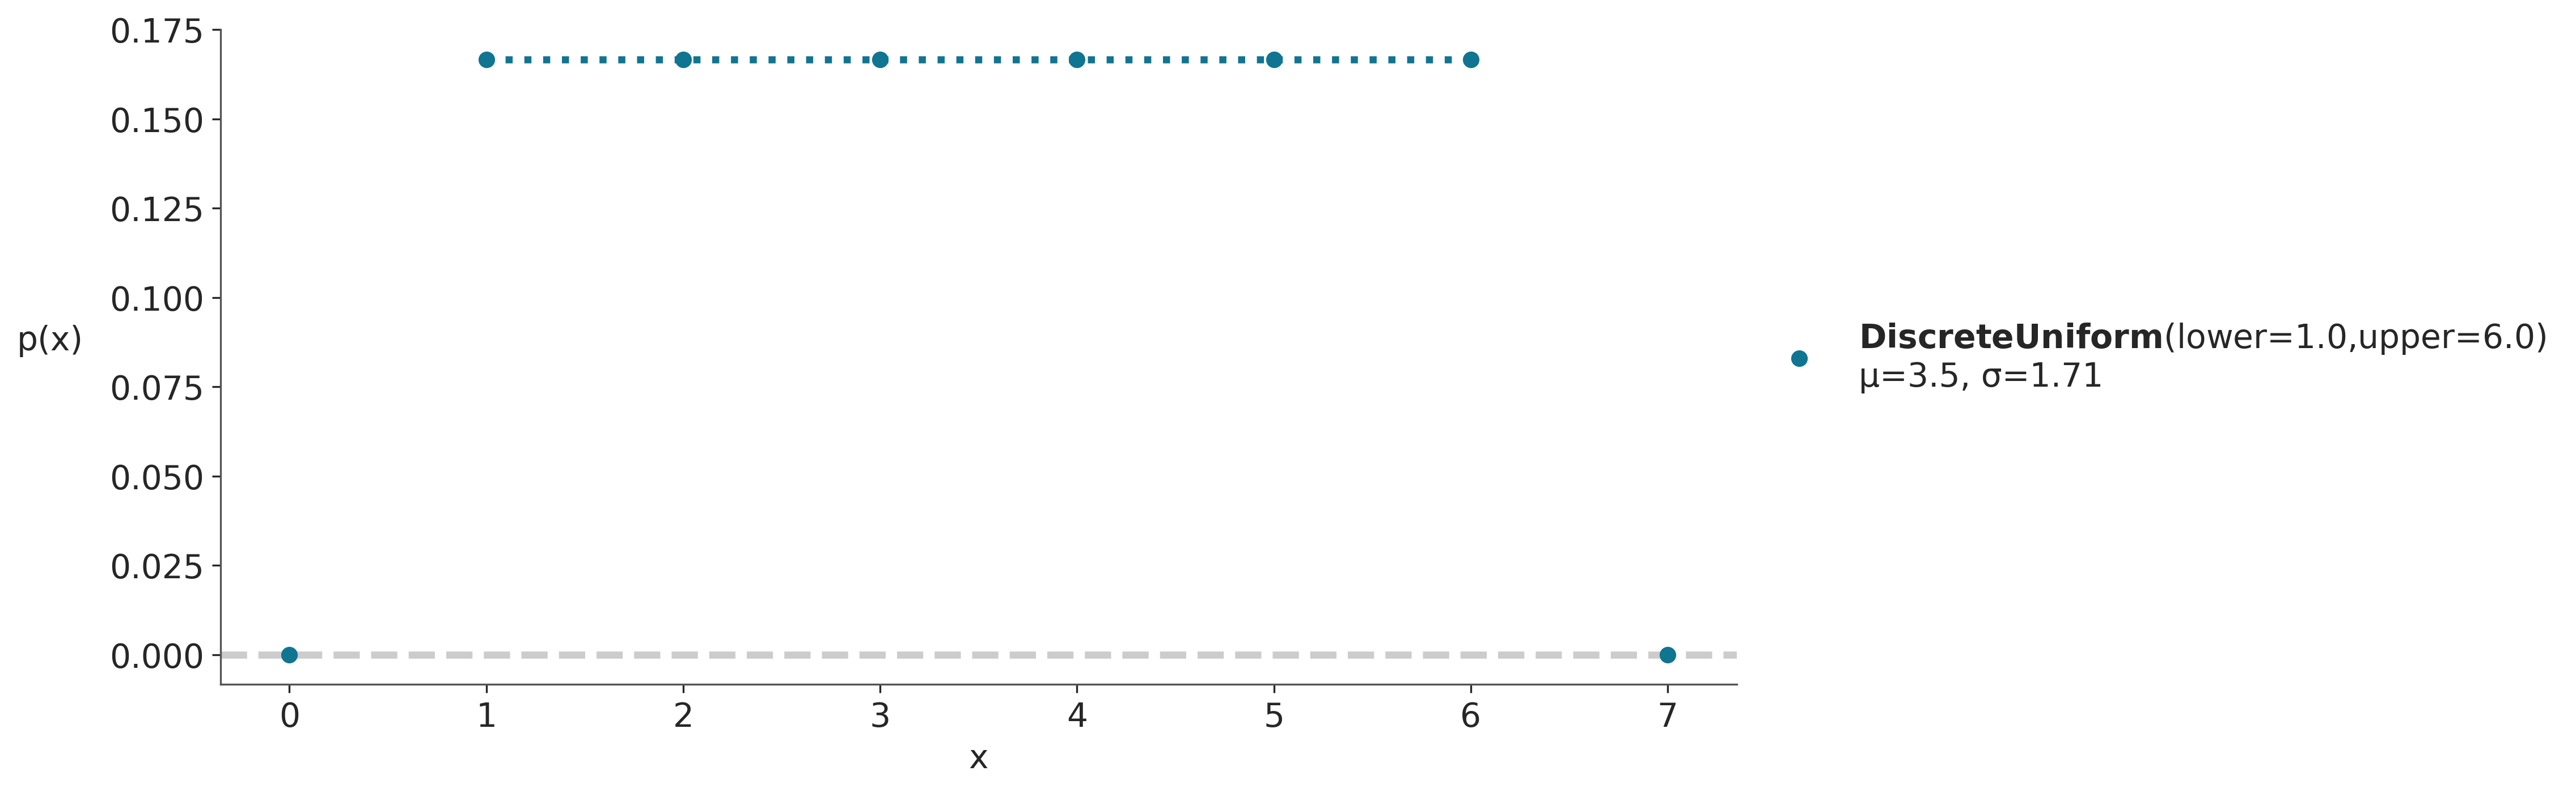

In [14]:
dist = pz.DiscreteUniform(lower=1, upper=6)
ax = dist.plot_pdf(moments="md", support=(0, 7))
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);
# Height indicates probability, 

### Binomial distribution
$$p(x|,np) = \frac{n!}{x!(n-x)!}p^{x}(1-p)^{n-x}$$
- Counts number of successes in $n$ Bernoulli trials, independent of each other, each with fixed probability $p$ of happenning. When $n=1$, its the same as Bernoulli.
- Term $p^{x}(1-p)^{n-x}$ calculates number of successes obtained but not the sequence in which they appear
- $\frac{n!}{x!(n-x)!}$ is the binomial coefficient, that calculates all possible combinations of the subsets of $x$ elements from a set with $n$ itens.

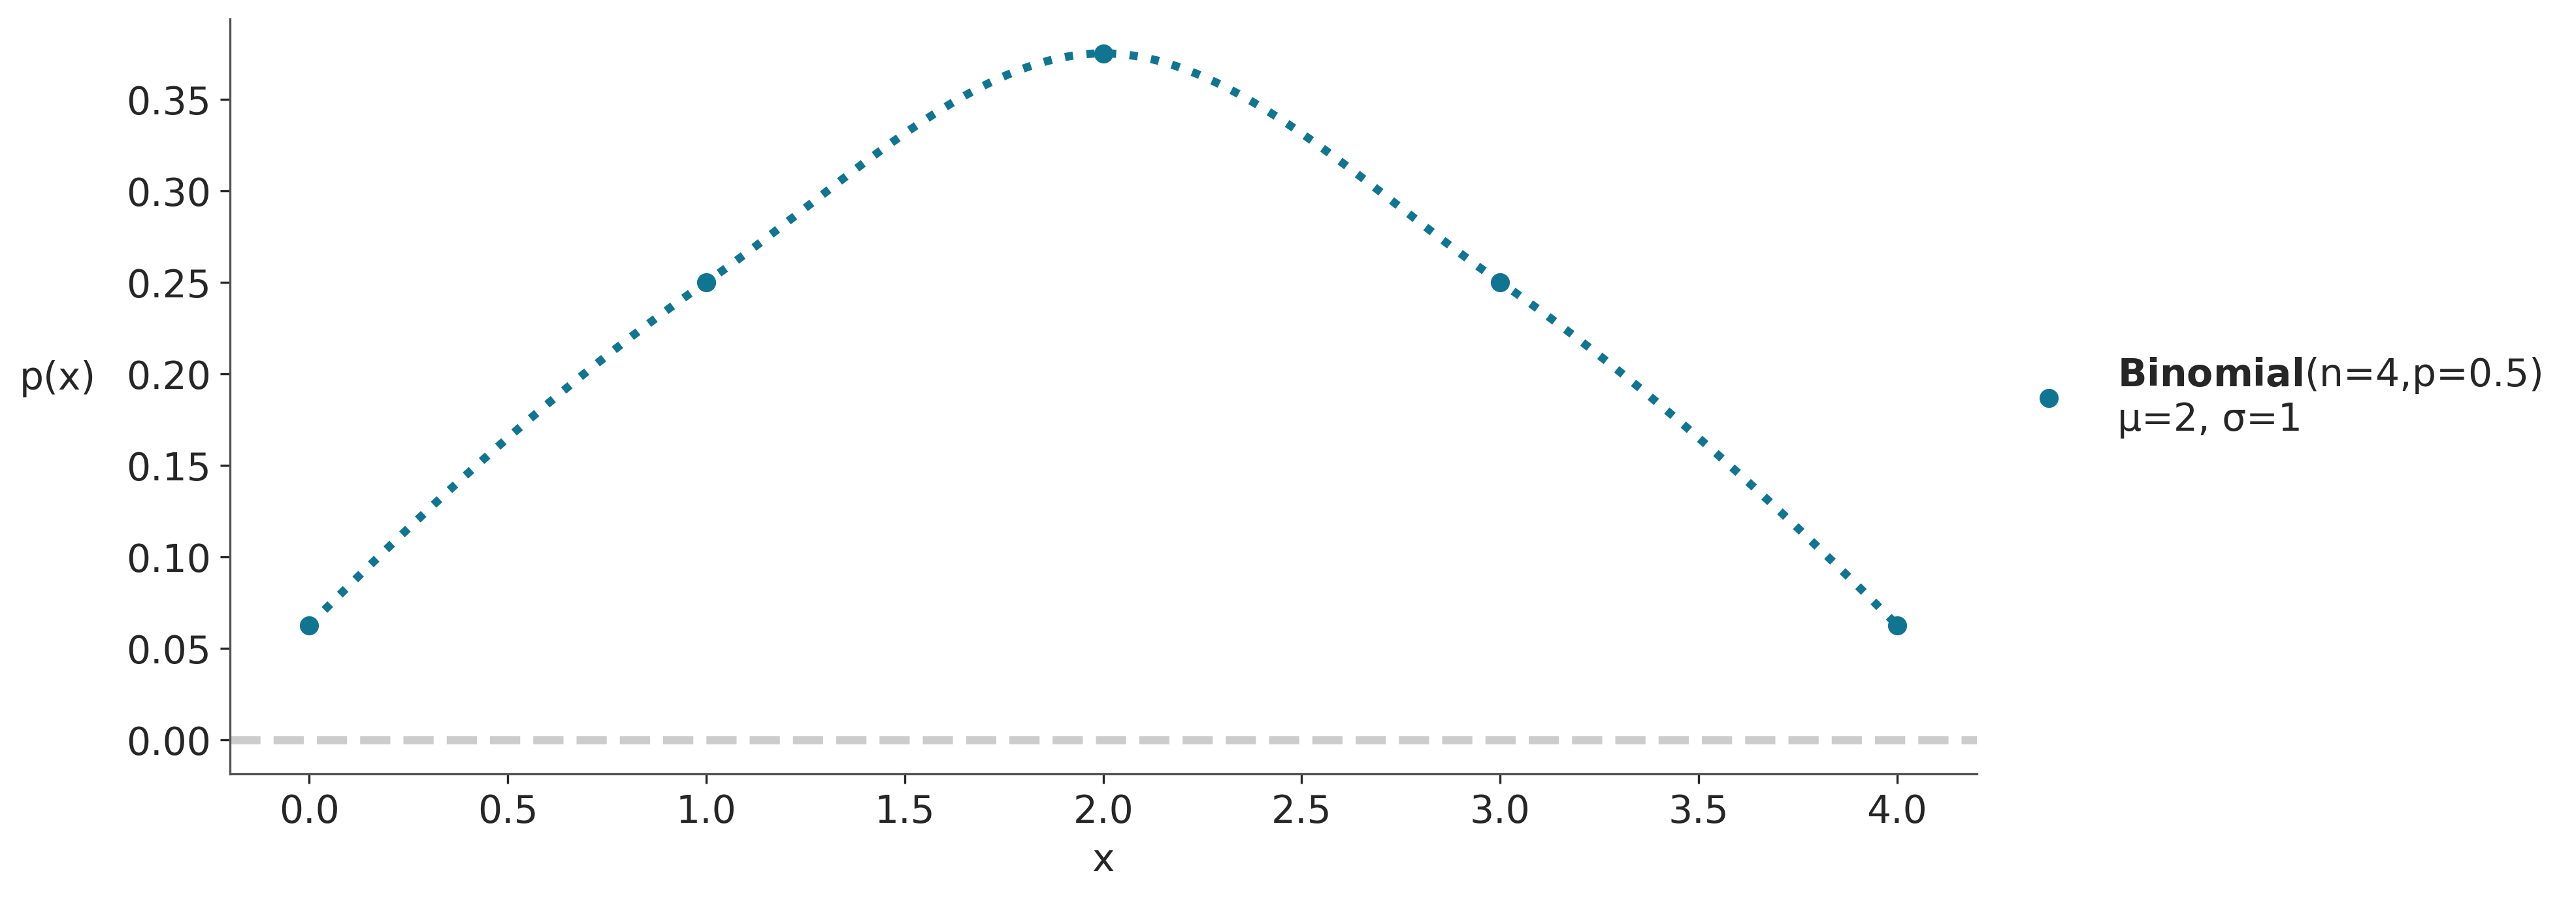

In [15]:
dist = pz.Binomial(n=4, p=0.5)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);

### Poisson distribution
$$p(x|\mu) = \frac{\mu^{x}e^{-\mu}}{x!}$$
- Probability that $x$ events happens in a fixed interval of time/space, when these events happen at a rate $\mu$ and independently of each other
- Both mean and variance are given by $\mu$.
- As $\mu$ increases it approaches a Gaussian distribution
- Closely related to binomial
  - Binomial can be approximated with a poisson distribution when $n >> p$.
- Poisson is also known as "the law of small numbers"

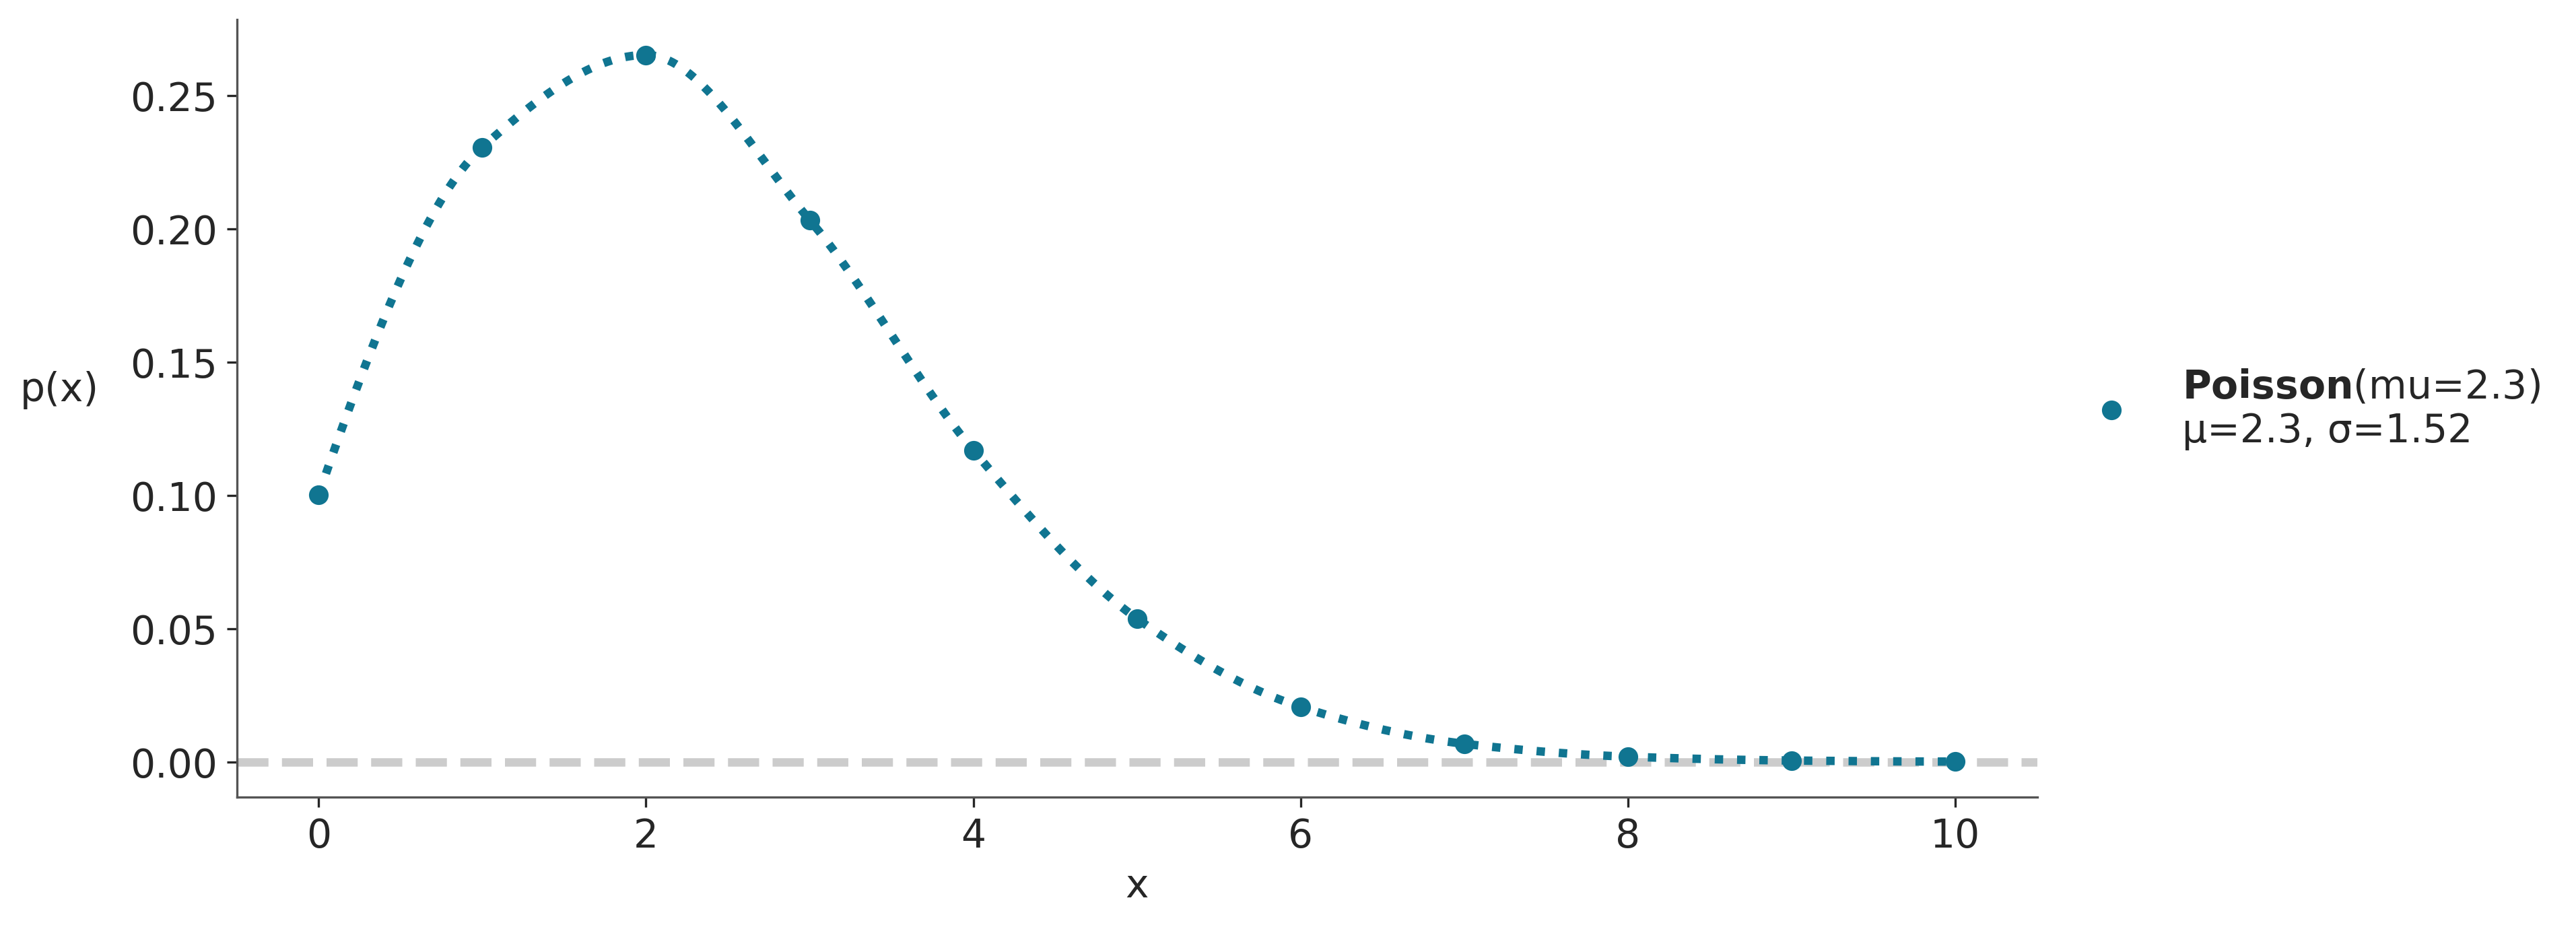

In [17]:
dist = pz.Poisson(mu=2.3)  # Number of times that is expected an event to occur
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);

## Continuous probability distributions
- In continuous distributions, we do not have finite number of points to add
- The height of the curve is the probability density
- If we want to find how much more probable $x1$ is than $x2$, we write
  - $\frac{pdf(x_{1})}{pdf(x_{2})}$
- **pdf** can be greater than 1. To obtain a probability over an interval, we must integrate over it
- **Its the area under the curve that gives the probability**
$$P(a < X < b) = \int^{b}_{a} pdf(x)dx$$

### Uniform distribution

$$p(x|a,b) = \begin{cases}
           \frac{1}{b-a} & \text{if} & a \leq x \leq b \\
           0 & otherwise
            \end{cases}
$$
- 

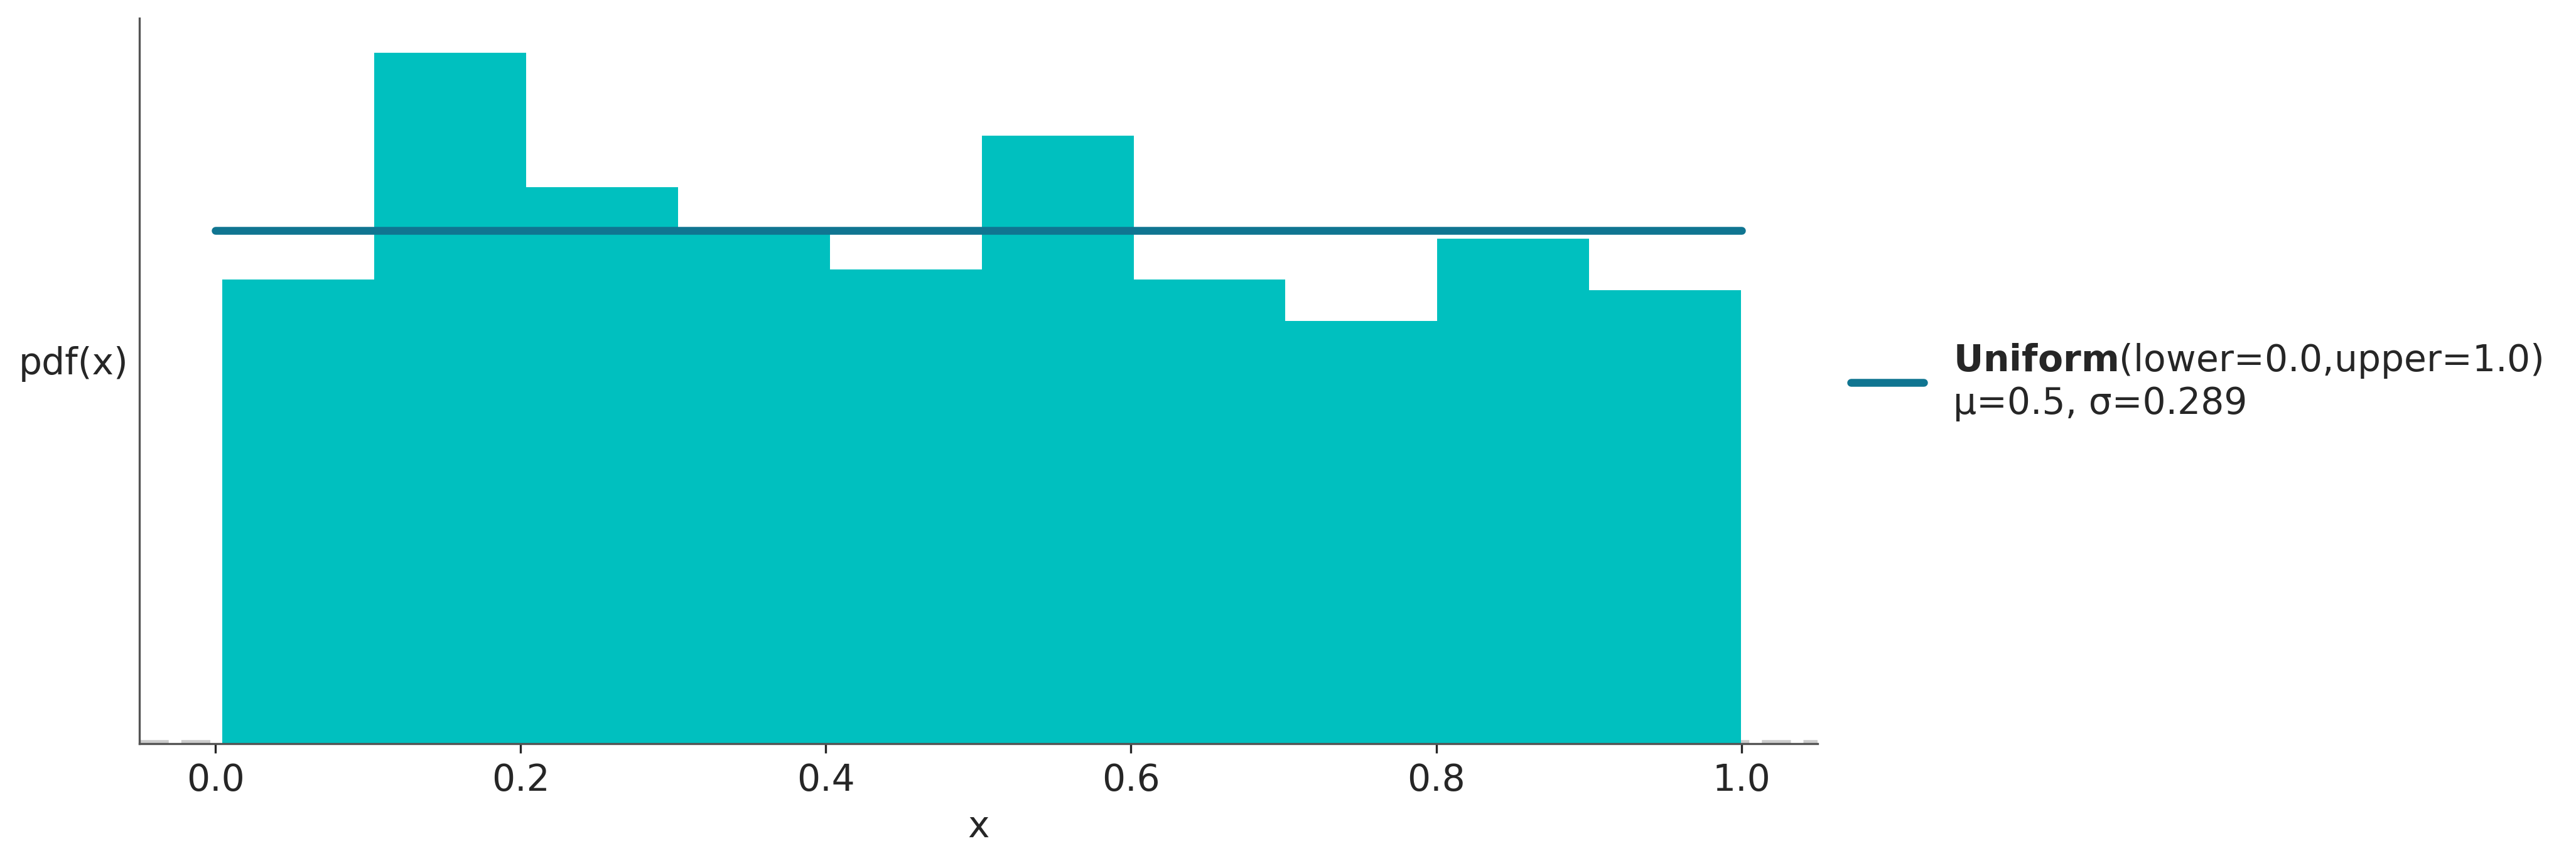

In [19]:
dist = pz.Uniform(0, 1)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);


### Gaussian (Normal) Distribution
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$
- Defined by the mean ($\mu$) and standard deviation ($\sigma$)

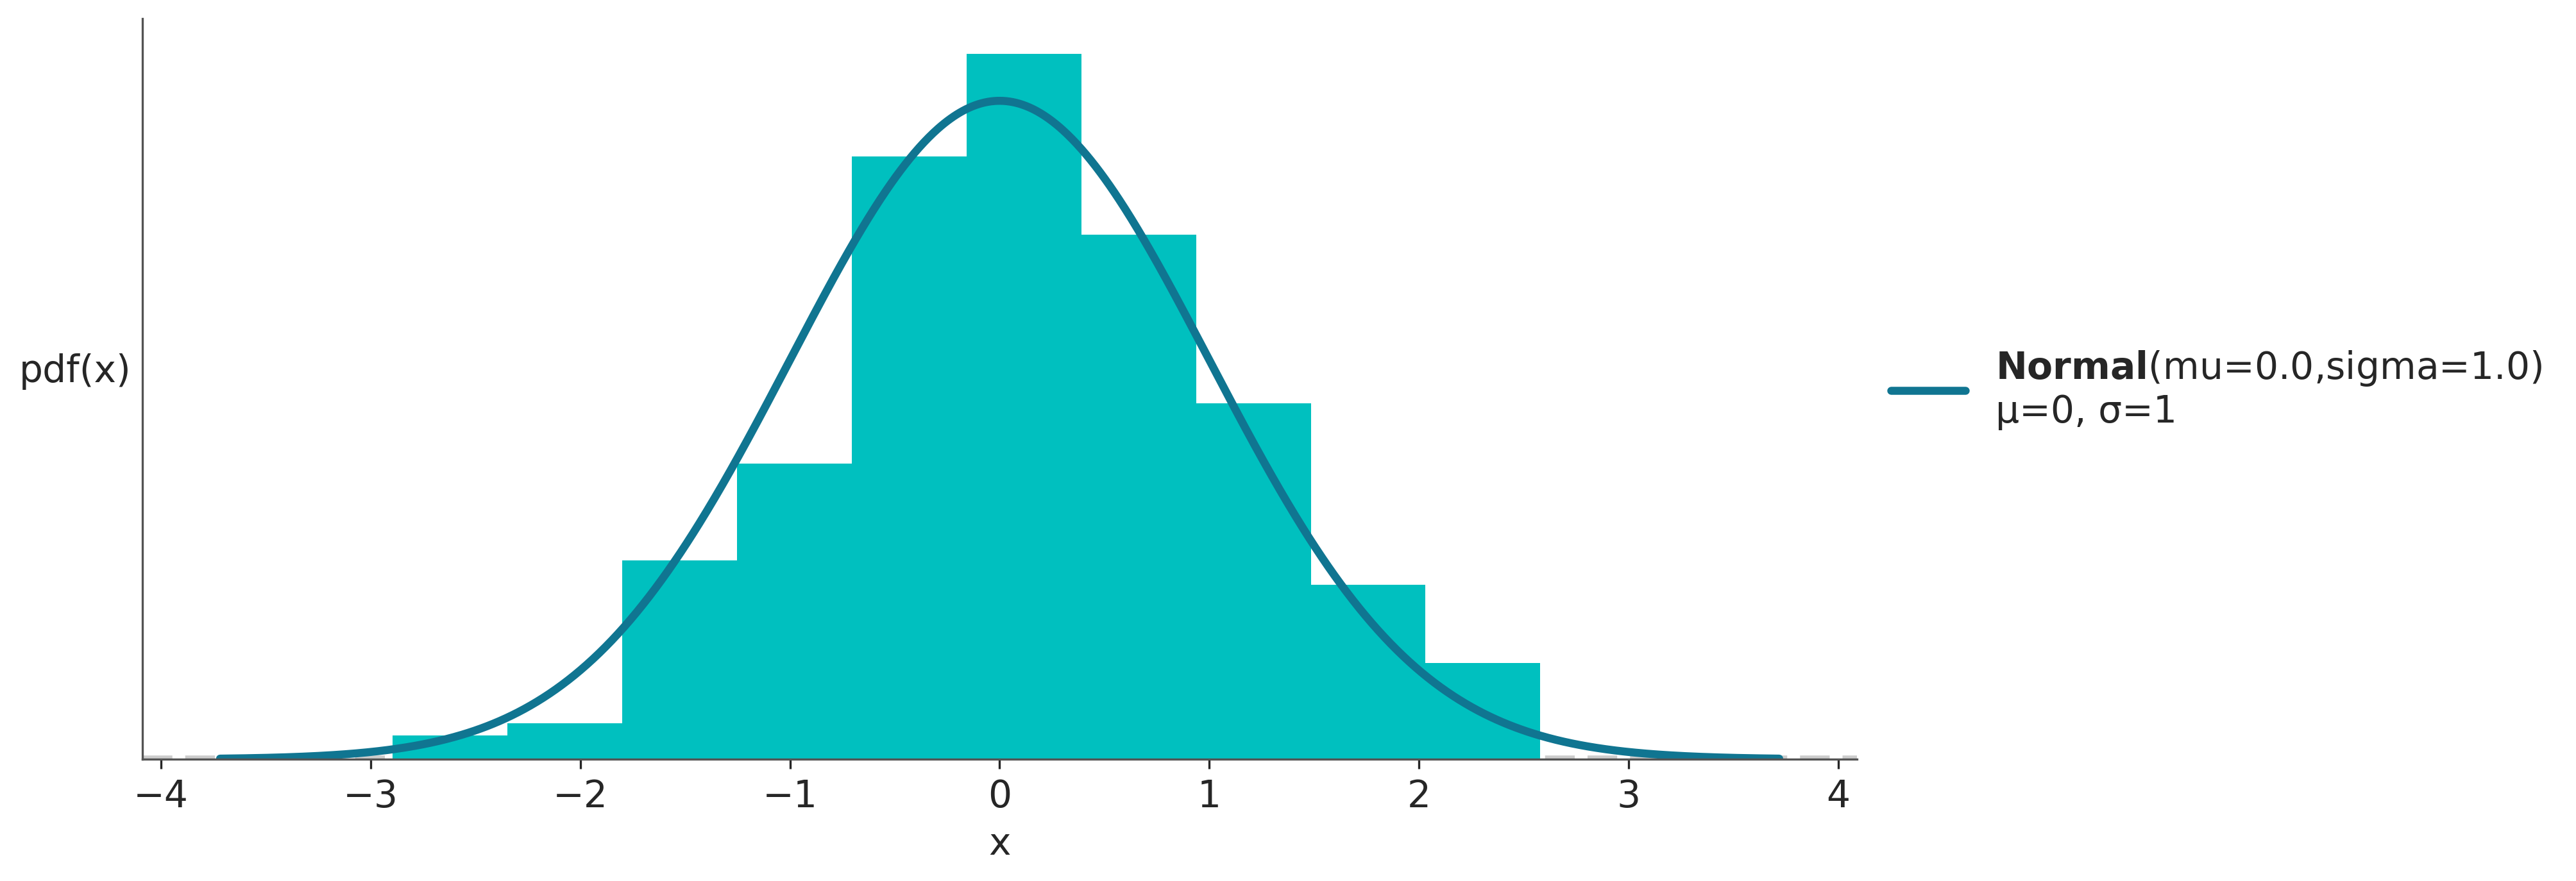

In [20]:
dist = pz.Normal(mu=0, sigma=1)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Student-t Distribution
$$p(x|v,\mu,\sigma) = \frac{\Gamma(\frac{v+1}{2})}{\Gamma({\frac{v}{2}})\sqrt{\pi v}\sigma}( 1 + \frac{1}{v}(\frac{x - \mu}{\sigma})^{2})^{\frac{-v+1}{2}}$$
- Arose to estimate the mean of a normally distributed population when sample size is small
- In Bayesian Statistics, is most used to generate robust models for aberrant data
- $v$: Degrees of freedom parameter
  - As $v$ increases, it approaches the normal distribution
  - When $v=1$, it's a Cauchy distribution
    - Doesnt have a defined mean/variance
- $\sigma$: It's the scale, not the standard deviation. As $\lim_{v\rightarrow \infty}$, it approaches the standard deviation.

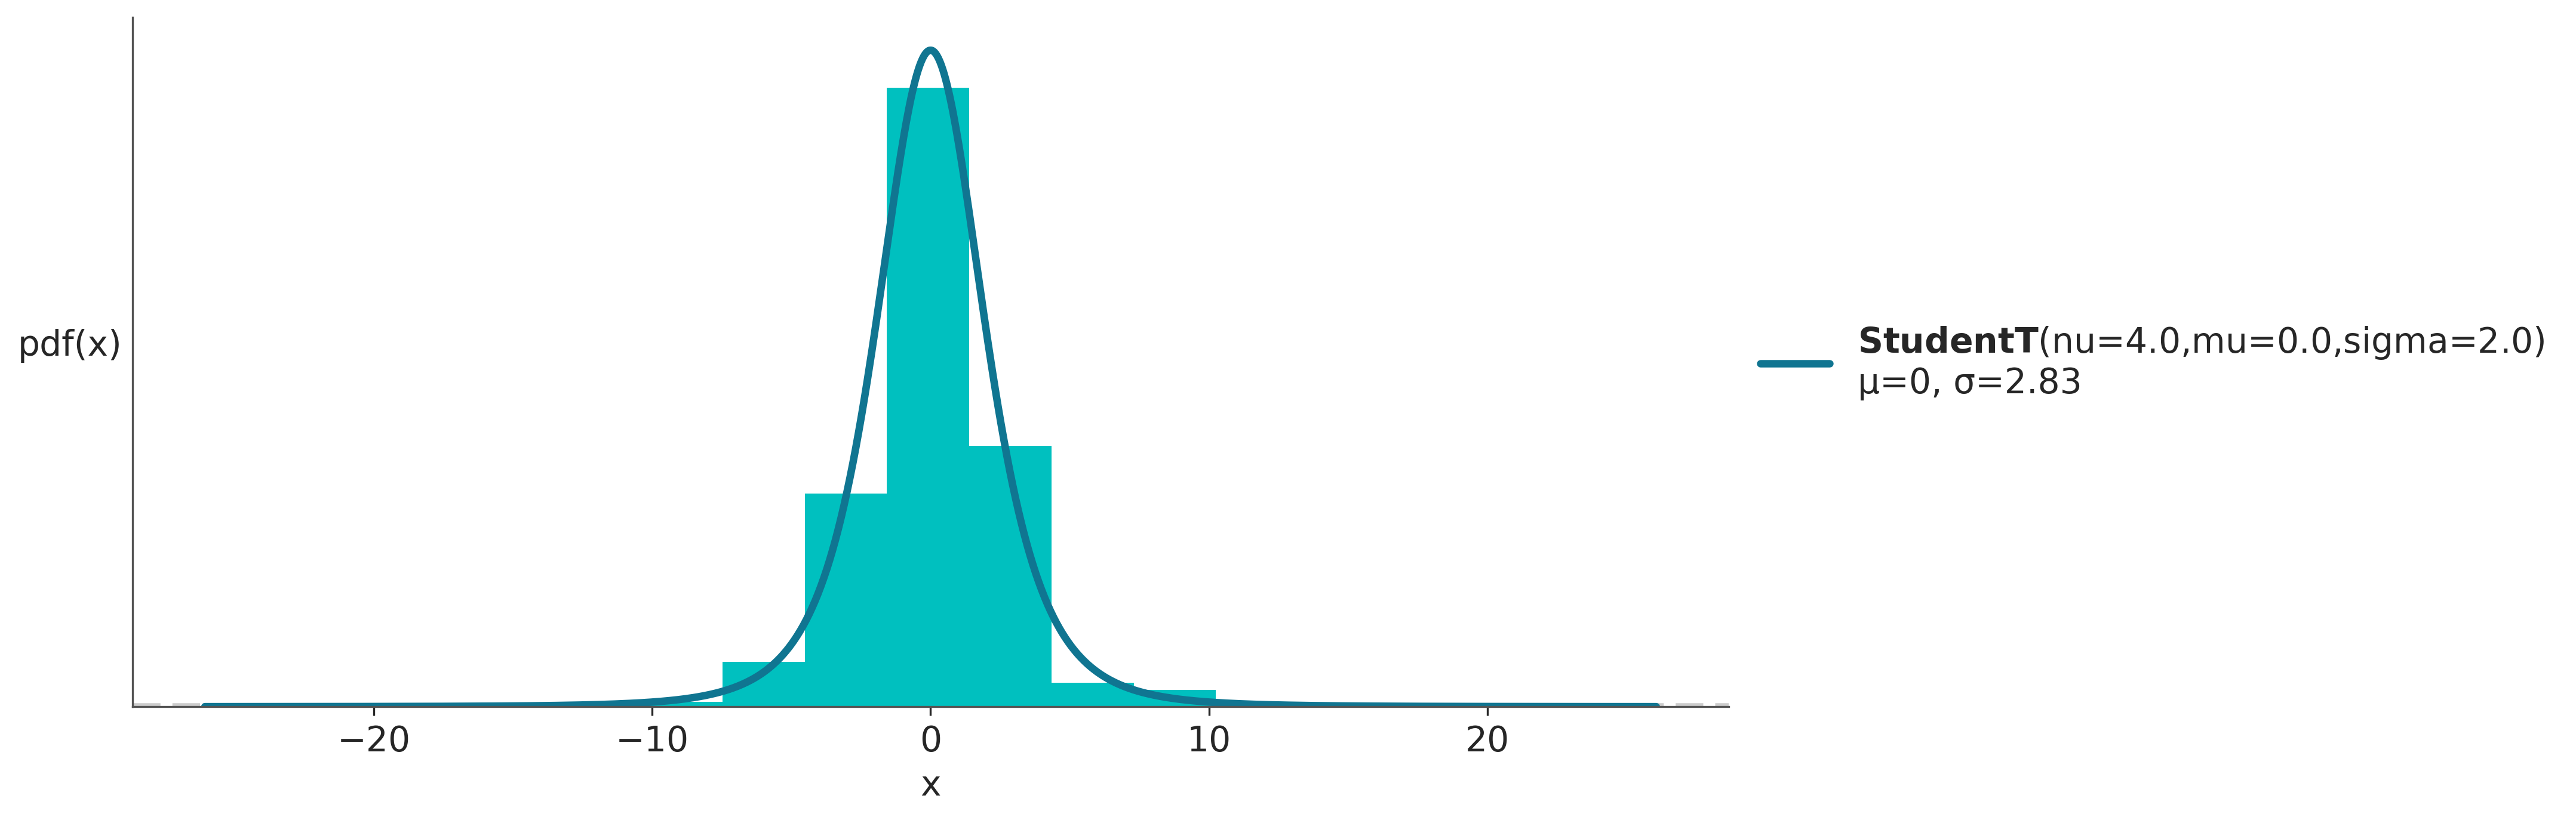

In [21]:
dist = pz.StudentT(nu=4, mu=0, sigma=2)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Exponential distribution

$$p(x|\lambda) = \lambda e^{-\lambda x}$$
- Defined only for $x > 0$
- Describe the time between two events that occur continuously and independtly at a fixed rate(Poisson)

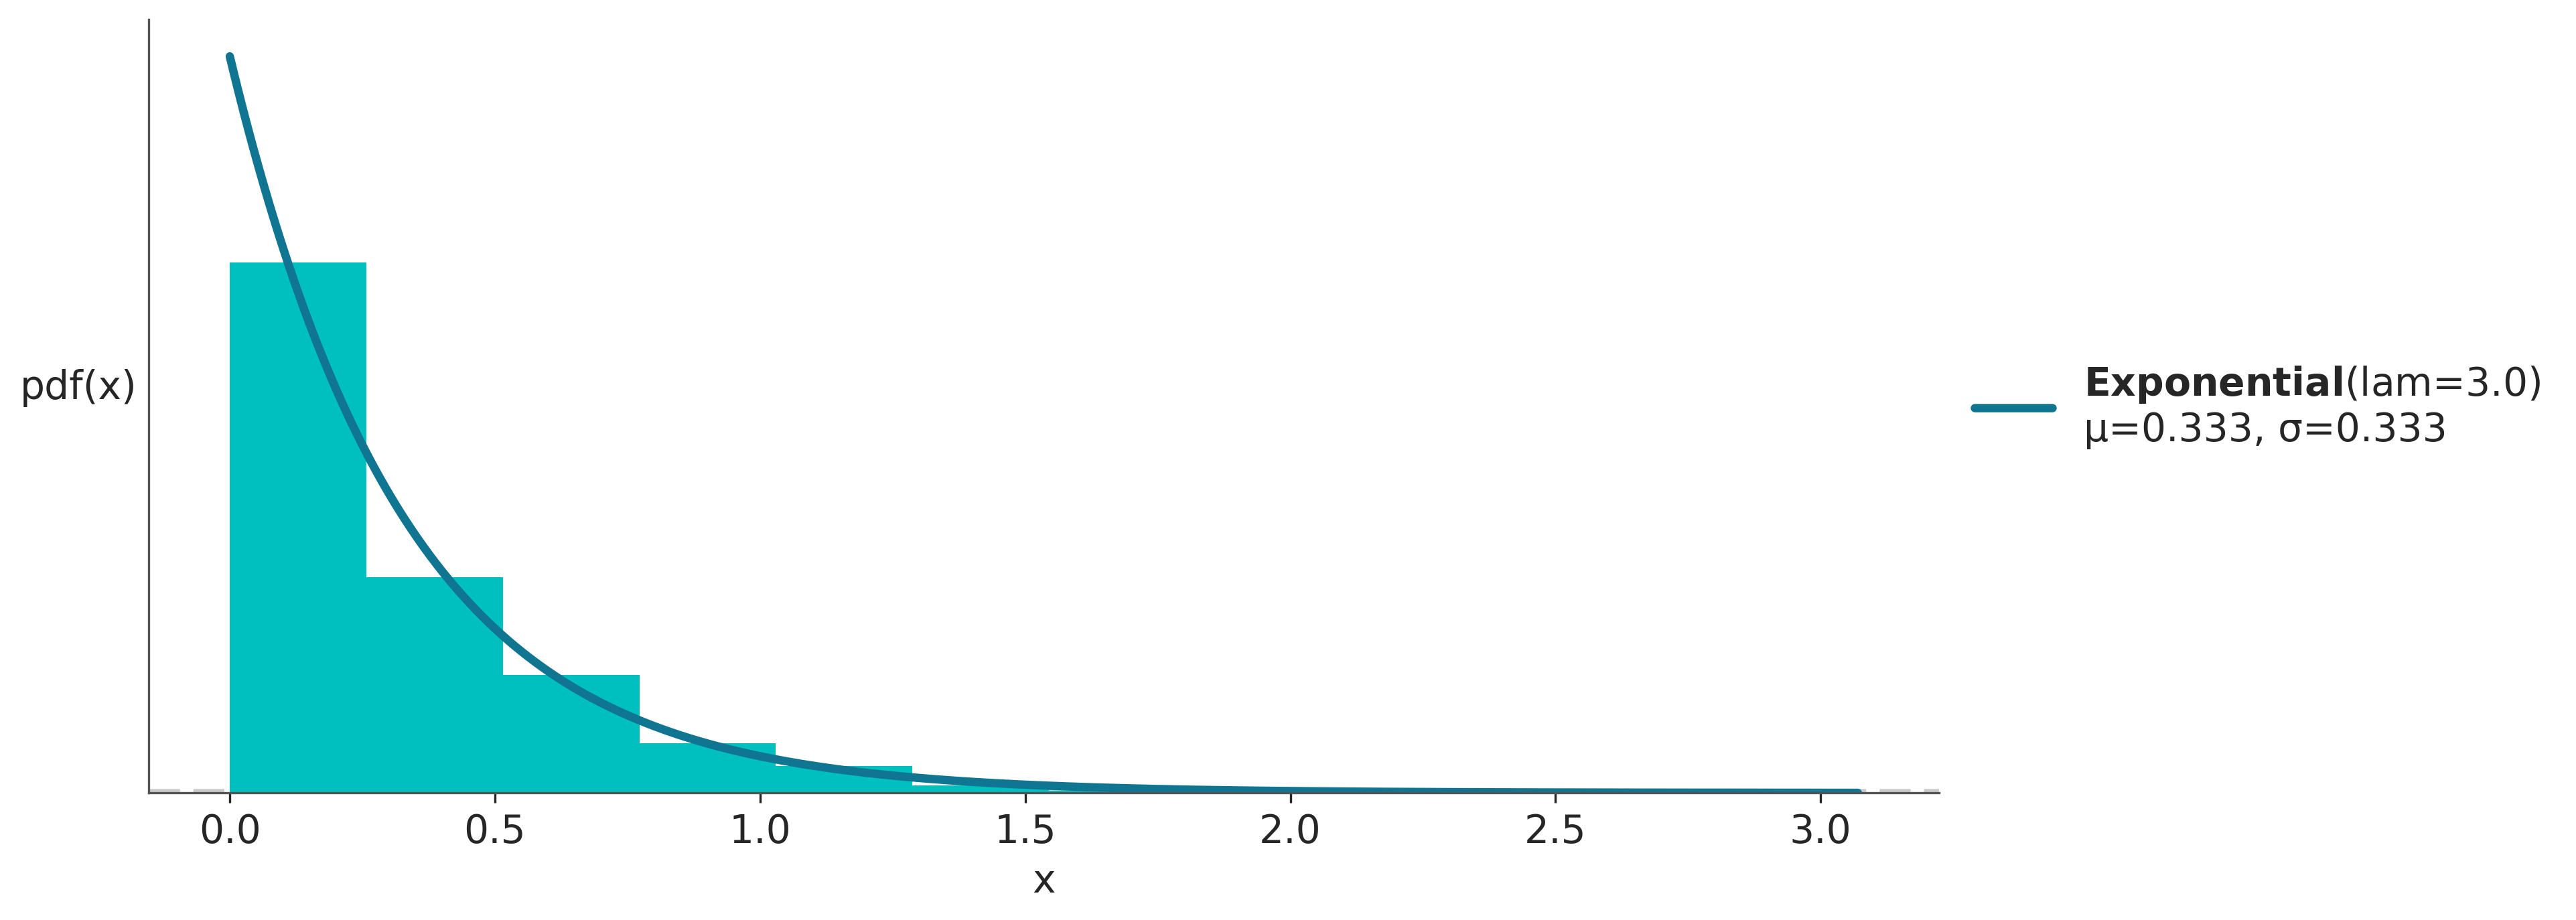

In [22]:
dist = pz.Exponential(3)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Laplace Distribution
$$p(x|\mu,b) = \frac{1}{2b}exp({\frac{\mid x - u \mid}{b}})$$
- Also called double exponential
- Arises from measuring the difference between two exponential variables(identically distributed)

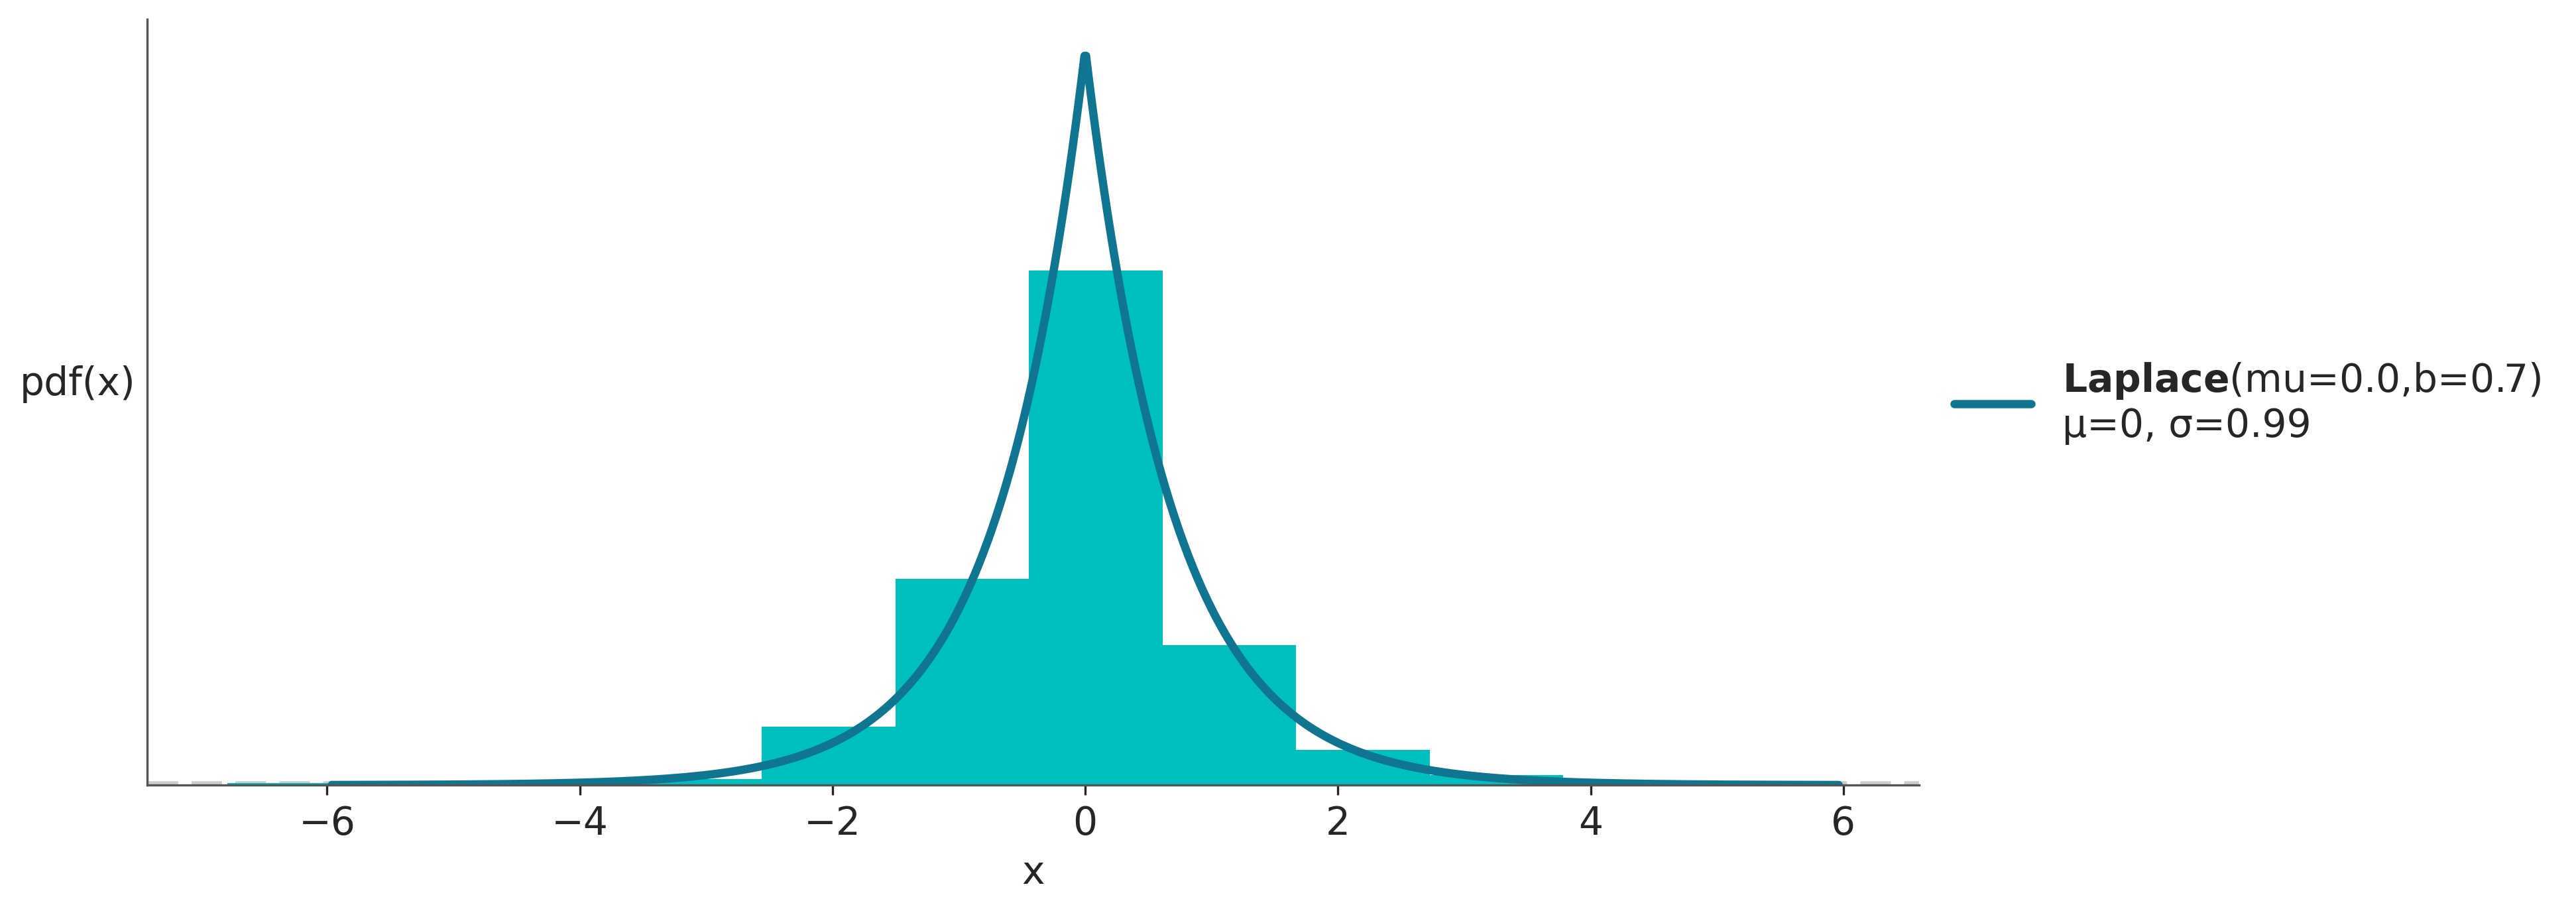

In [23]:
dist = pz.Laplace(0, 0.7)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Beta distribution
$$p(x|\alpha,\beta) = \frac{\Gamma({\alpha + \beta})}{\Gamma({\alpha})\Gamma({\beta})}x^{\alpha-1}(1-x)^{\beta-1}$$
- Defined on the $[0,1]$ interval
- Useful for modelling percentages
- When $\alpha=\beta=1$, the distribution becomes the uniform distribution
- Can be expressed as
  - $\alpha = \mu\kappa$
  - $\beta = (1-\mu)\kappa$
  - $\kappa$ is $\alpha + \beta$

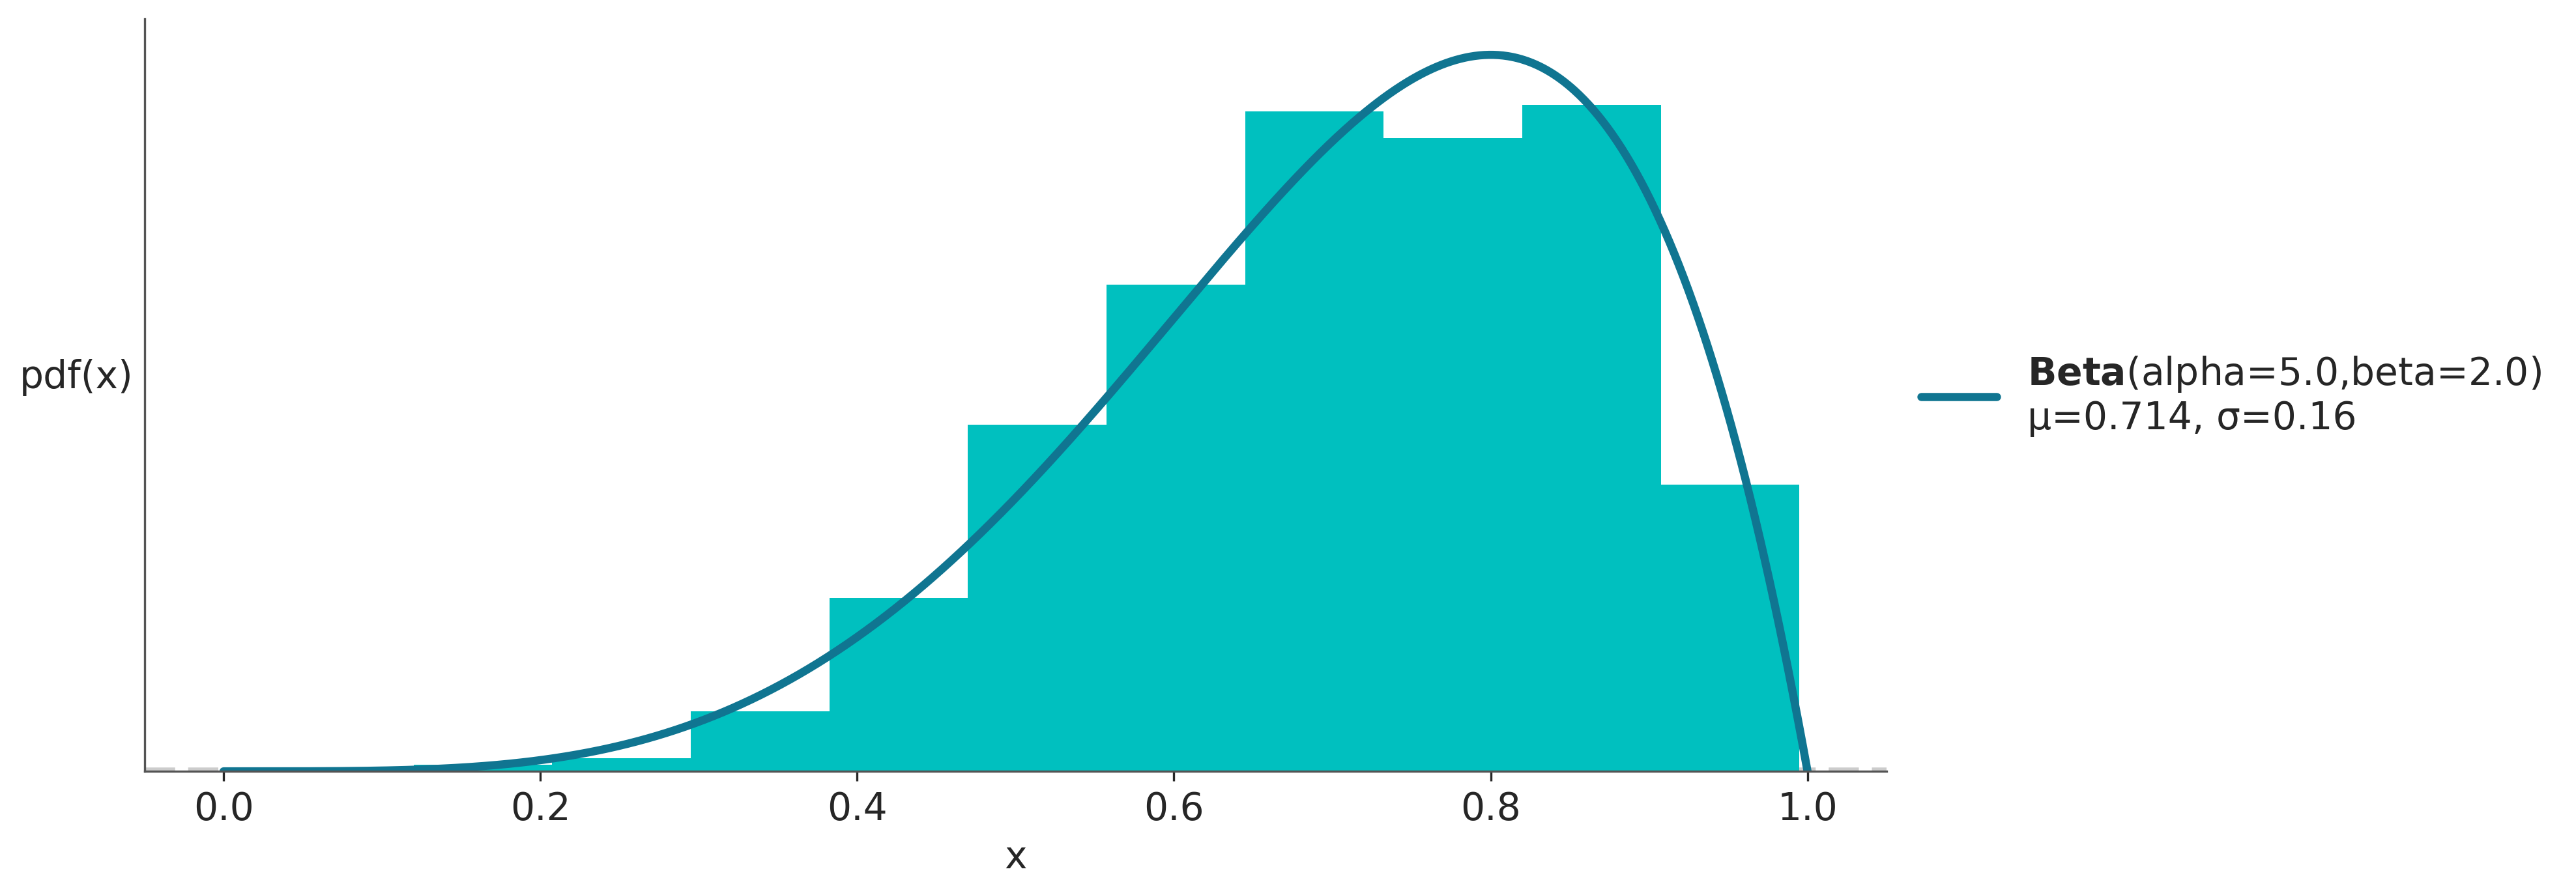

In [24]:
dist = pz.Beta(5, 2)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

### Gamma distribution
$$p(x|\alpha,\beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma({\alpha})}$$

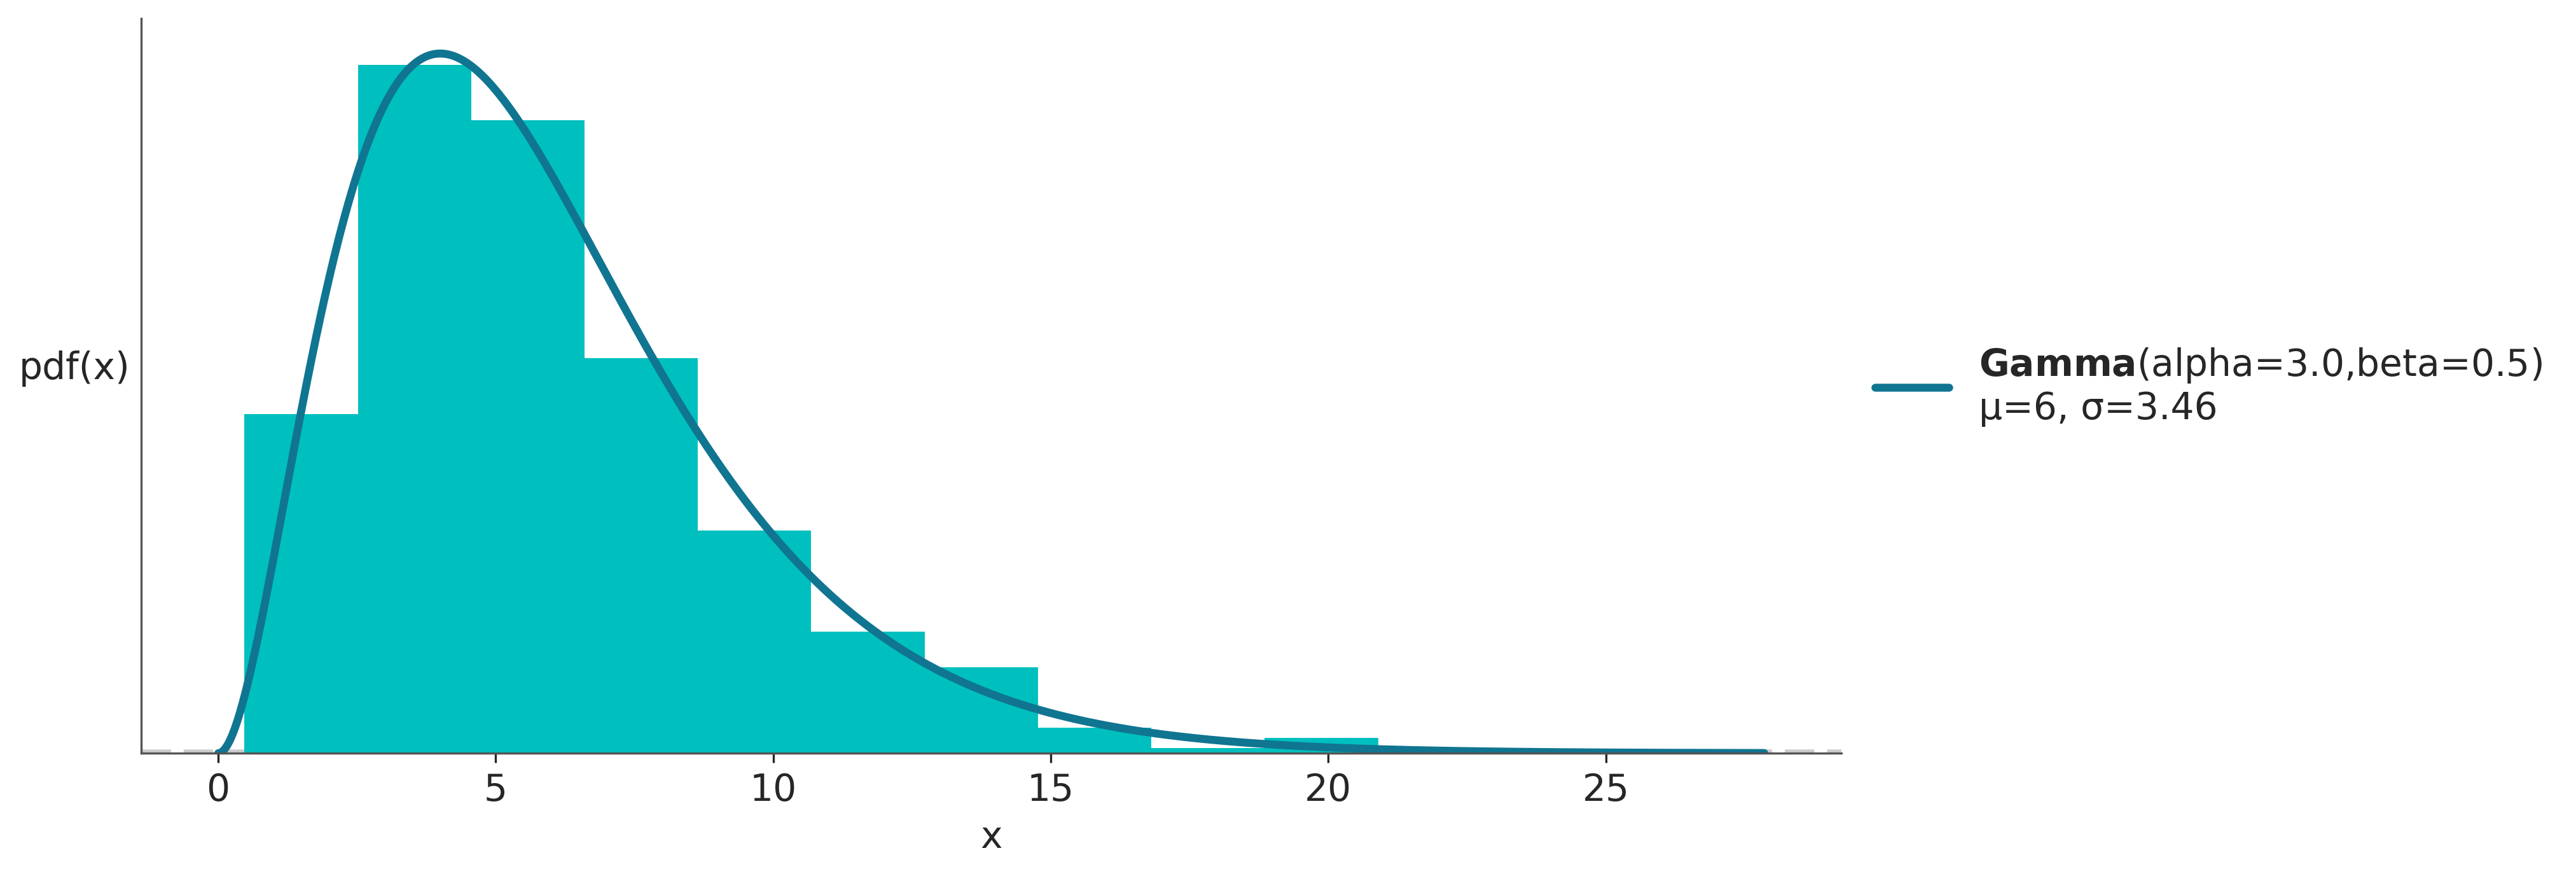

In [25]:
dist = pz.Gamma(alpha=3, beta=0.5)
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);

## Expected Value
- Summarizes the center of mass of the distribution
- With $X$ being a discrete random variable
  - $\mathbb{E}[X] = \sum_{i=1}^n x_{i}p(x_{i})$
- Variance:
  - $\mathbb{V}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$
- Moment-n of a discrete variable:
  - $\mathbb{E}[X^n]$

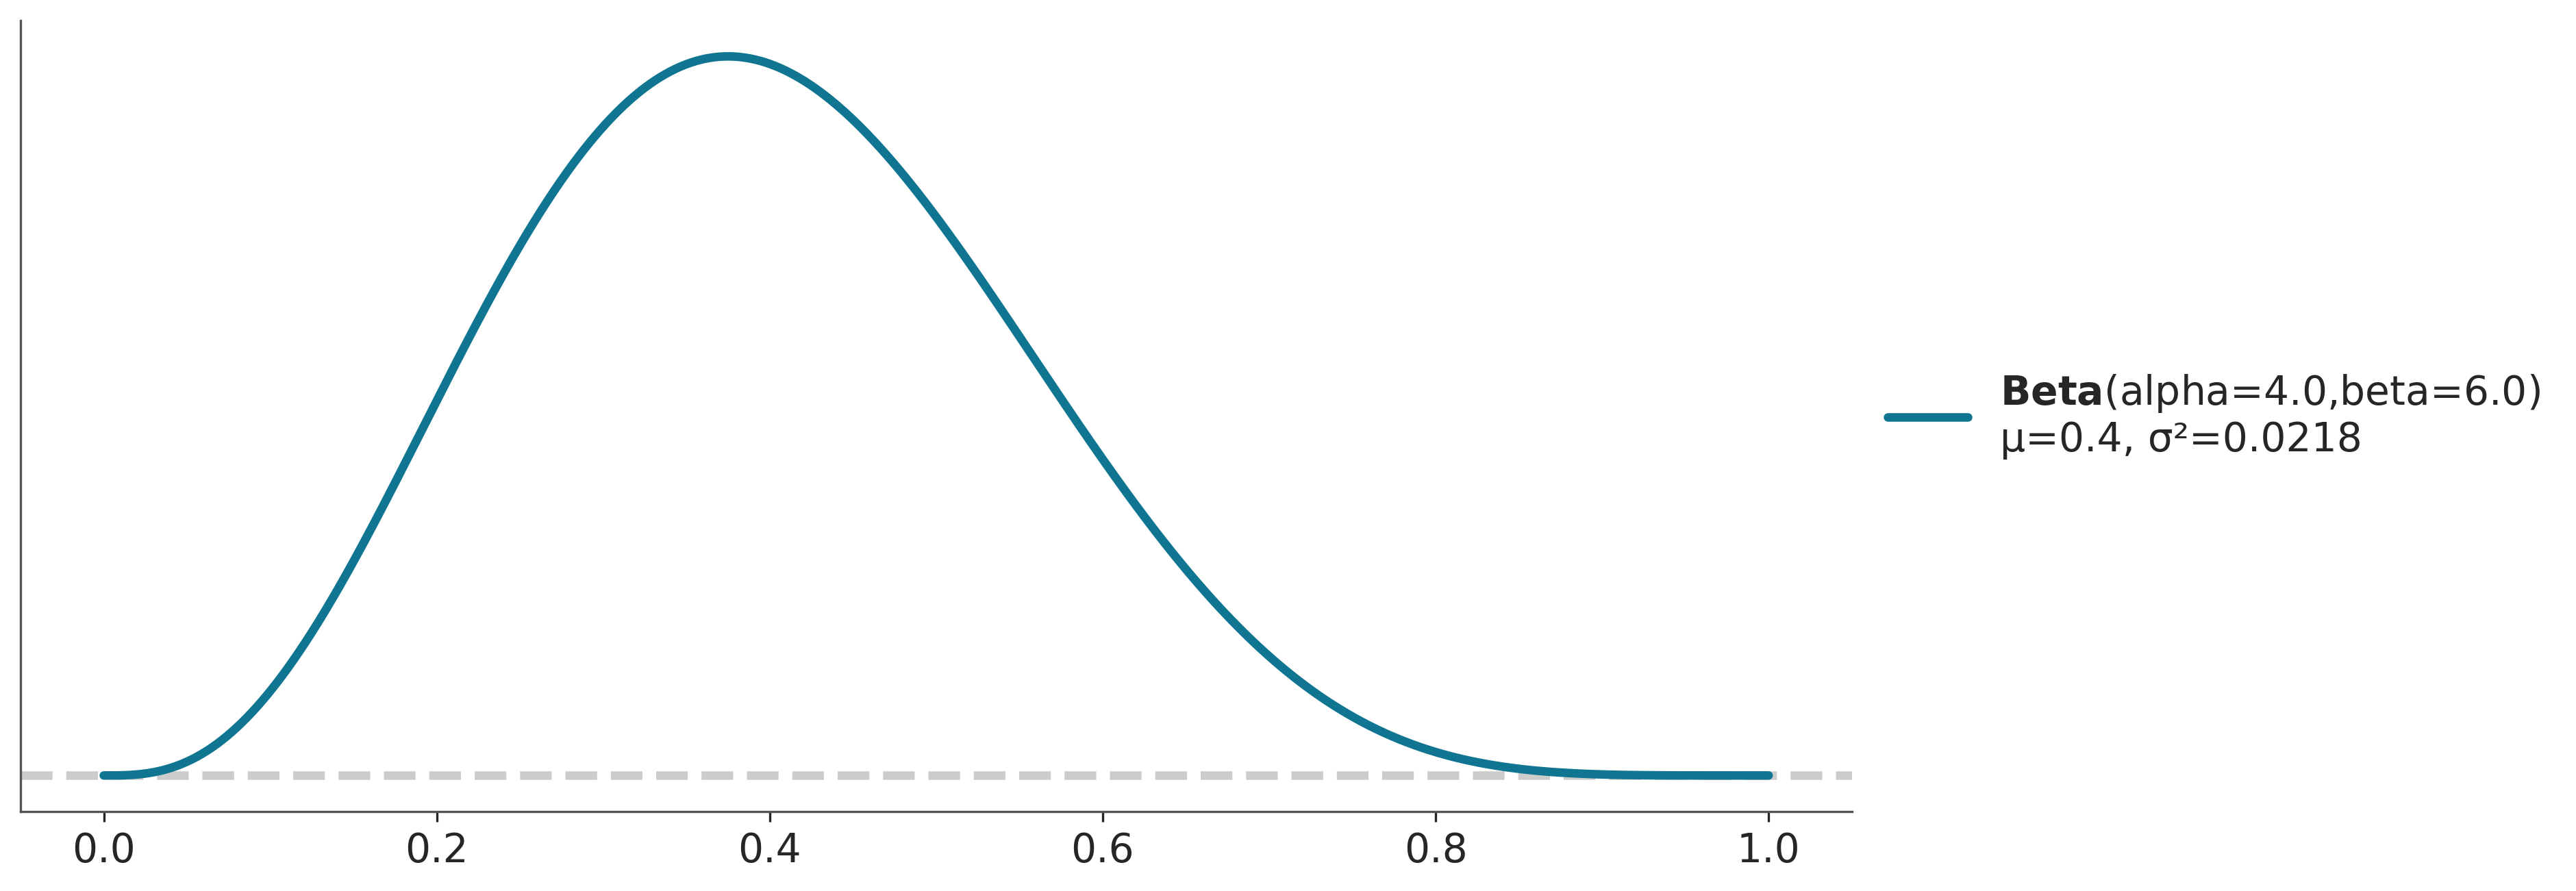

In [28]:
pz.Beta(4, 6).plot_pdf(moments="mv"); ## mean and variance

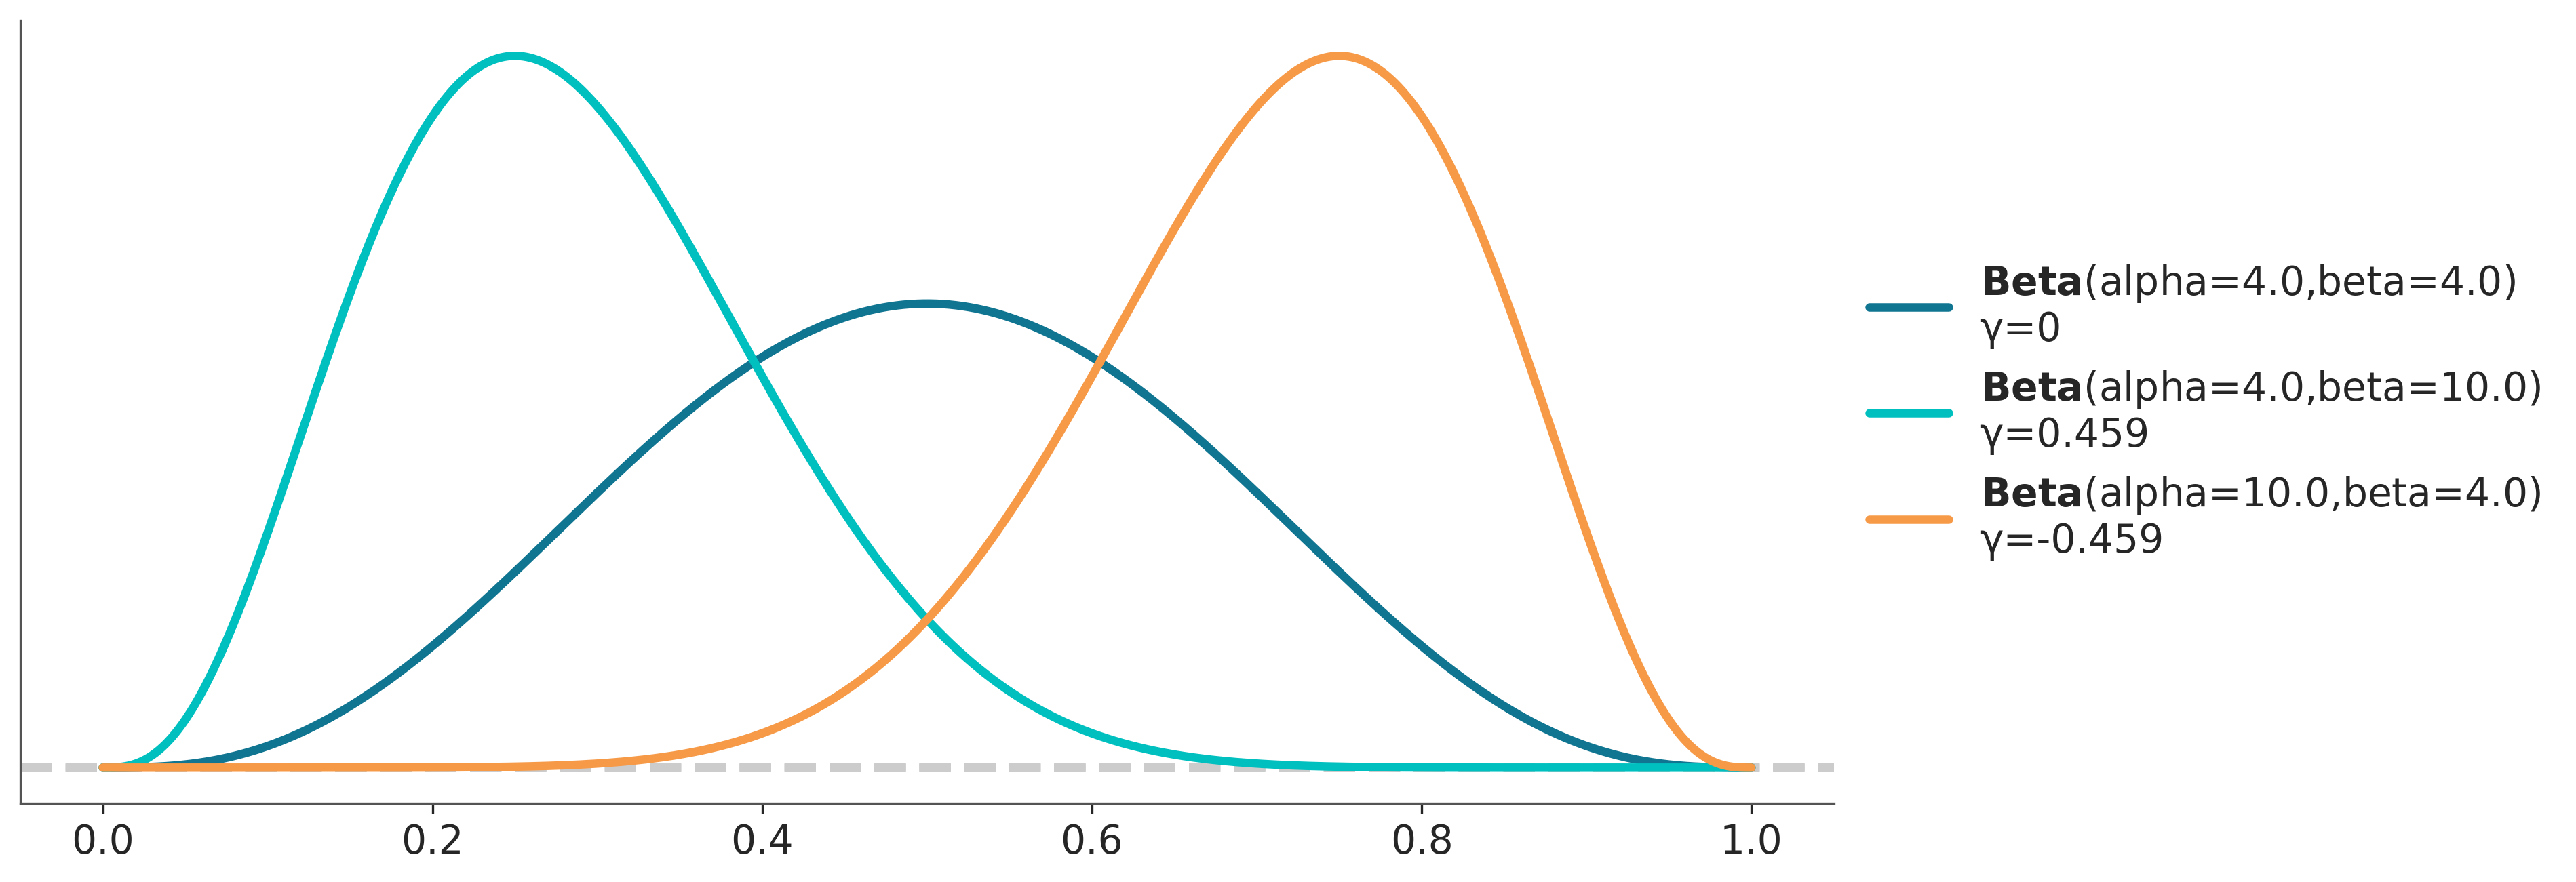

In [29]:
pz.Beta(4, 4).plot_pdf(moments="s"); # Third moment -> Assymmetry of the distribution
pz.Beta(4, 10).plot_pdf(moments="s"); 
pz.Beta(10, 4).plot_pdf(moments="s");

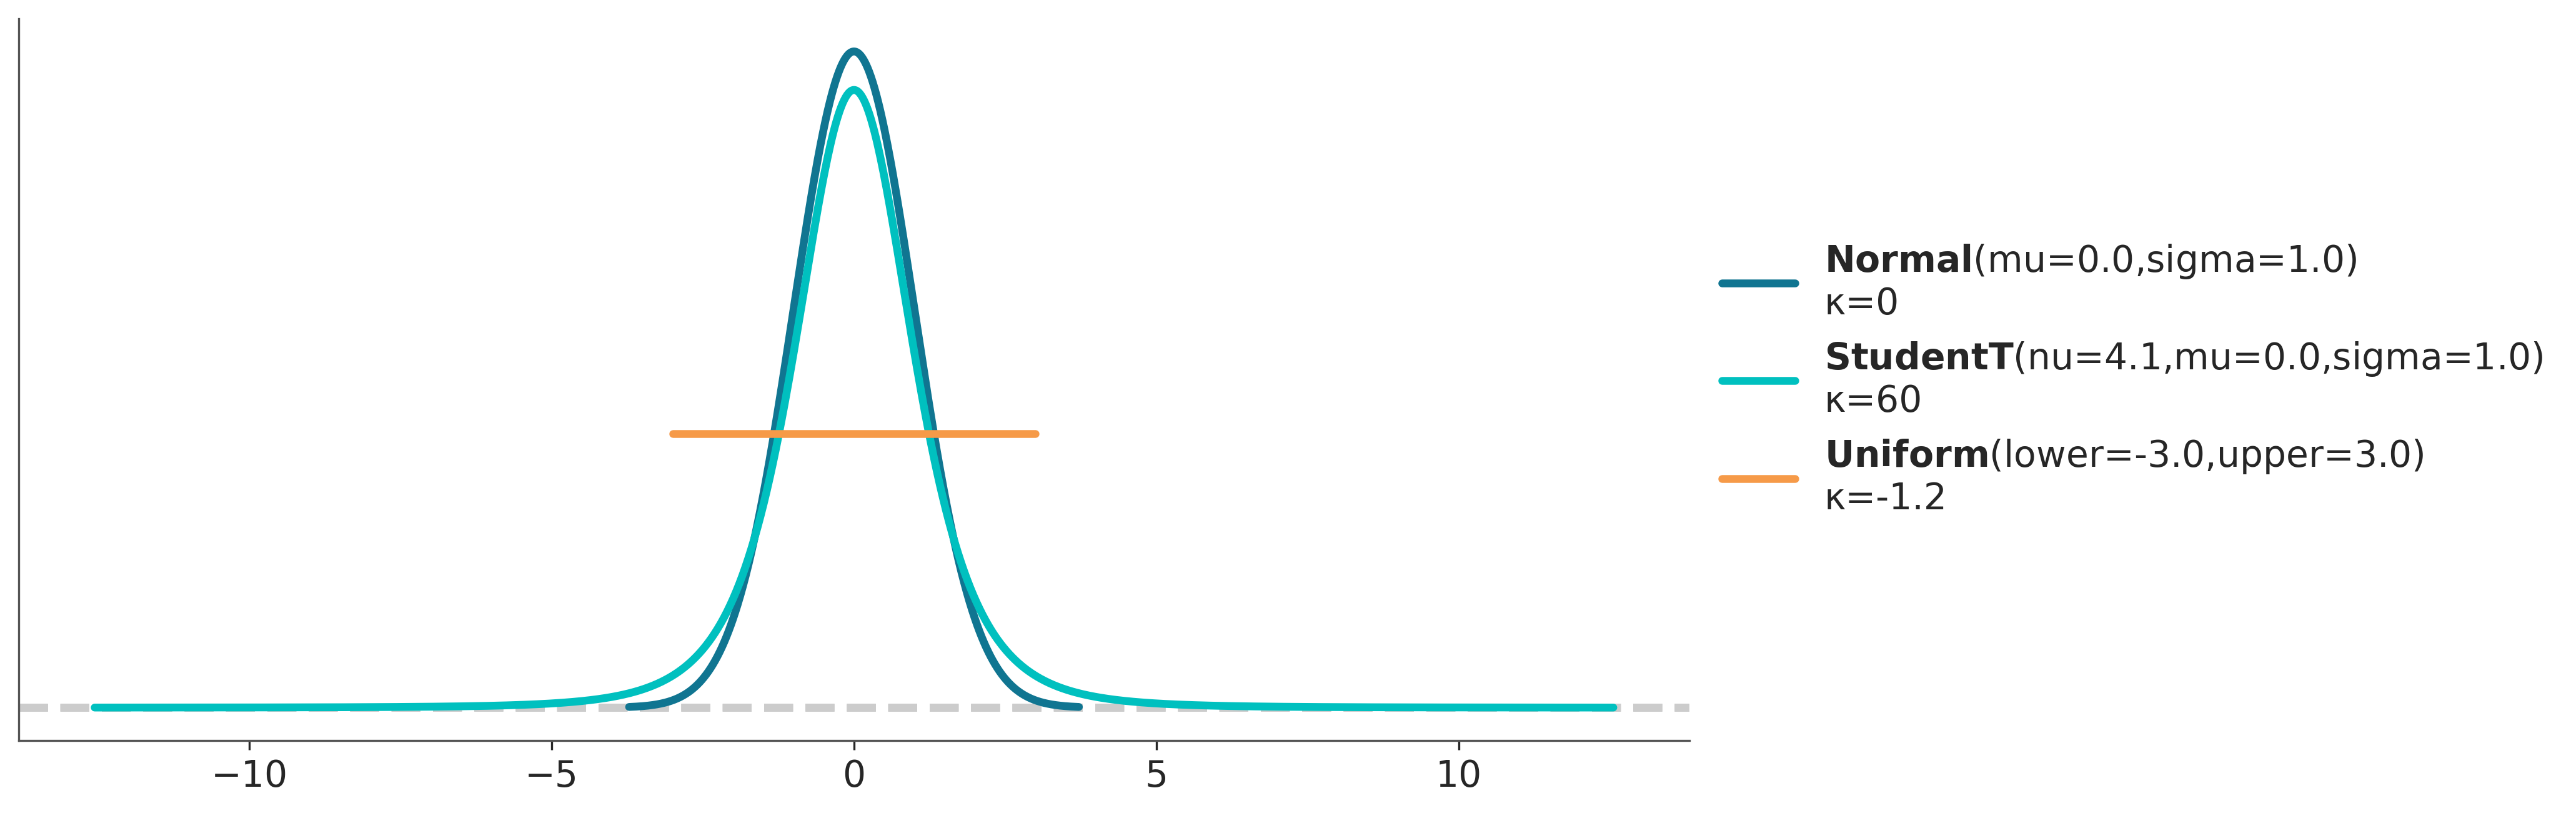

In [30]:
pz.Normal(0, 1).plot_pdf(moments="k"); # Kurtosis (4th moment), behaviour of the tails Larger kurtosis -> Heavier tails
pz.StudentT(4.1, 0, 1).plot_pdf(moments="k");
pz.Uniform(-3, 3).plot_pdf(moments="k");

## Cumulative distribution
$$cdf(x) = \int_{-\infty}^x pdf(x)d(x)$$
- Integral of pdf
- Survival function
  - $S(x) = 1 - cdf(x)$


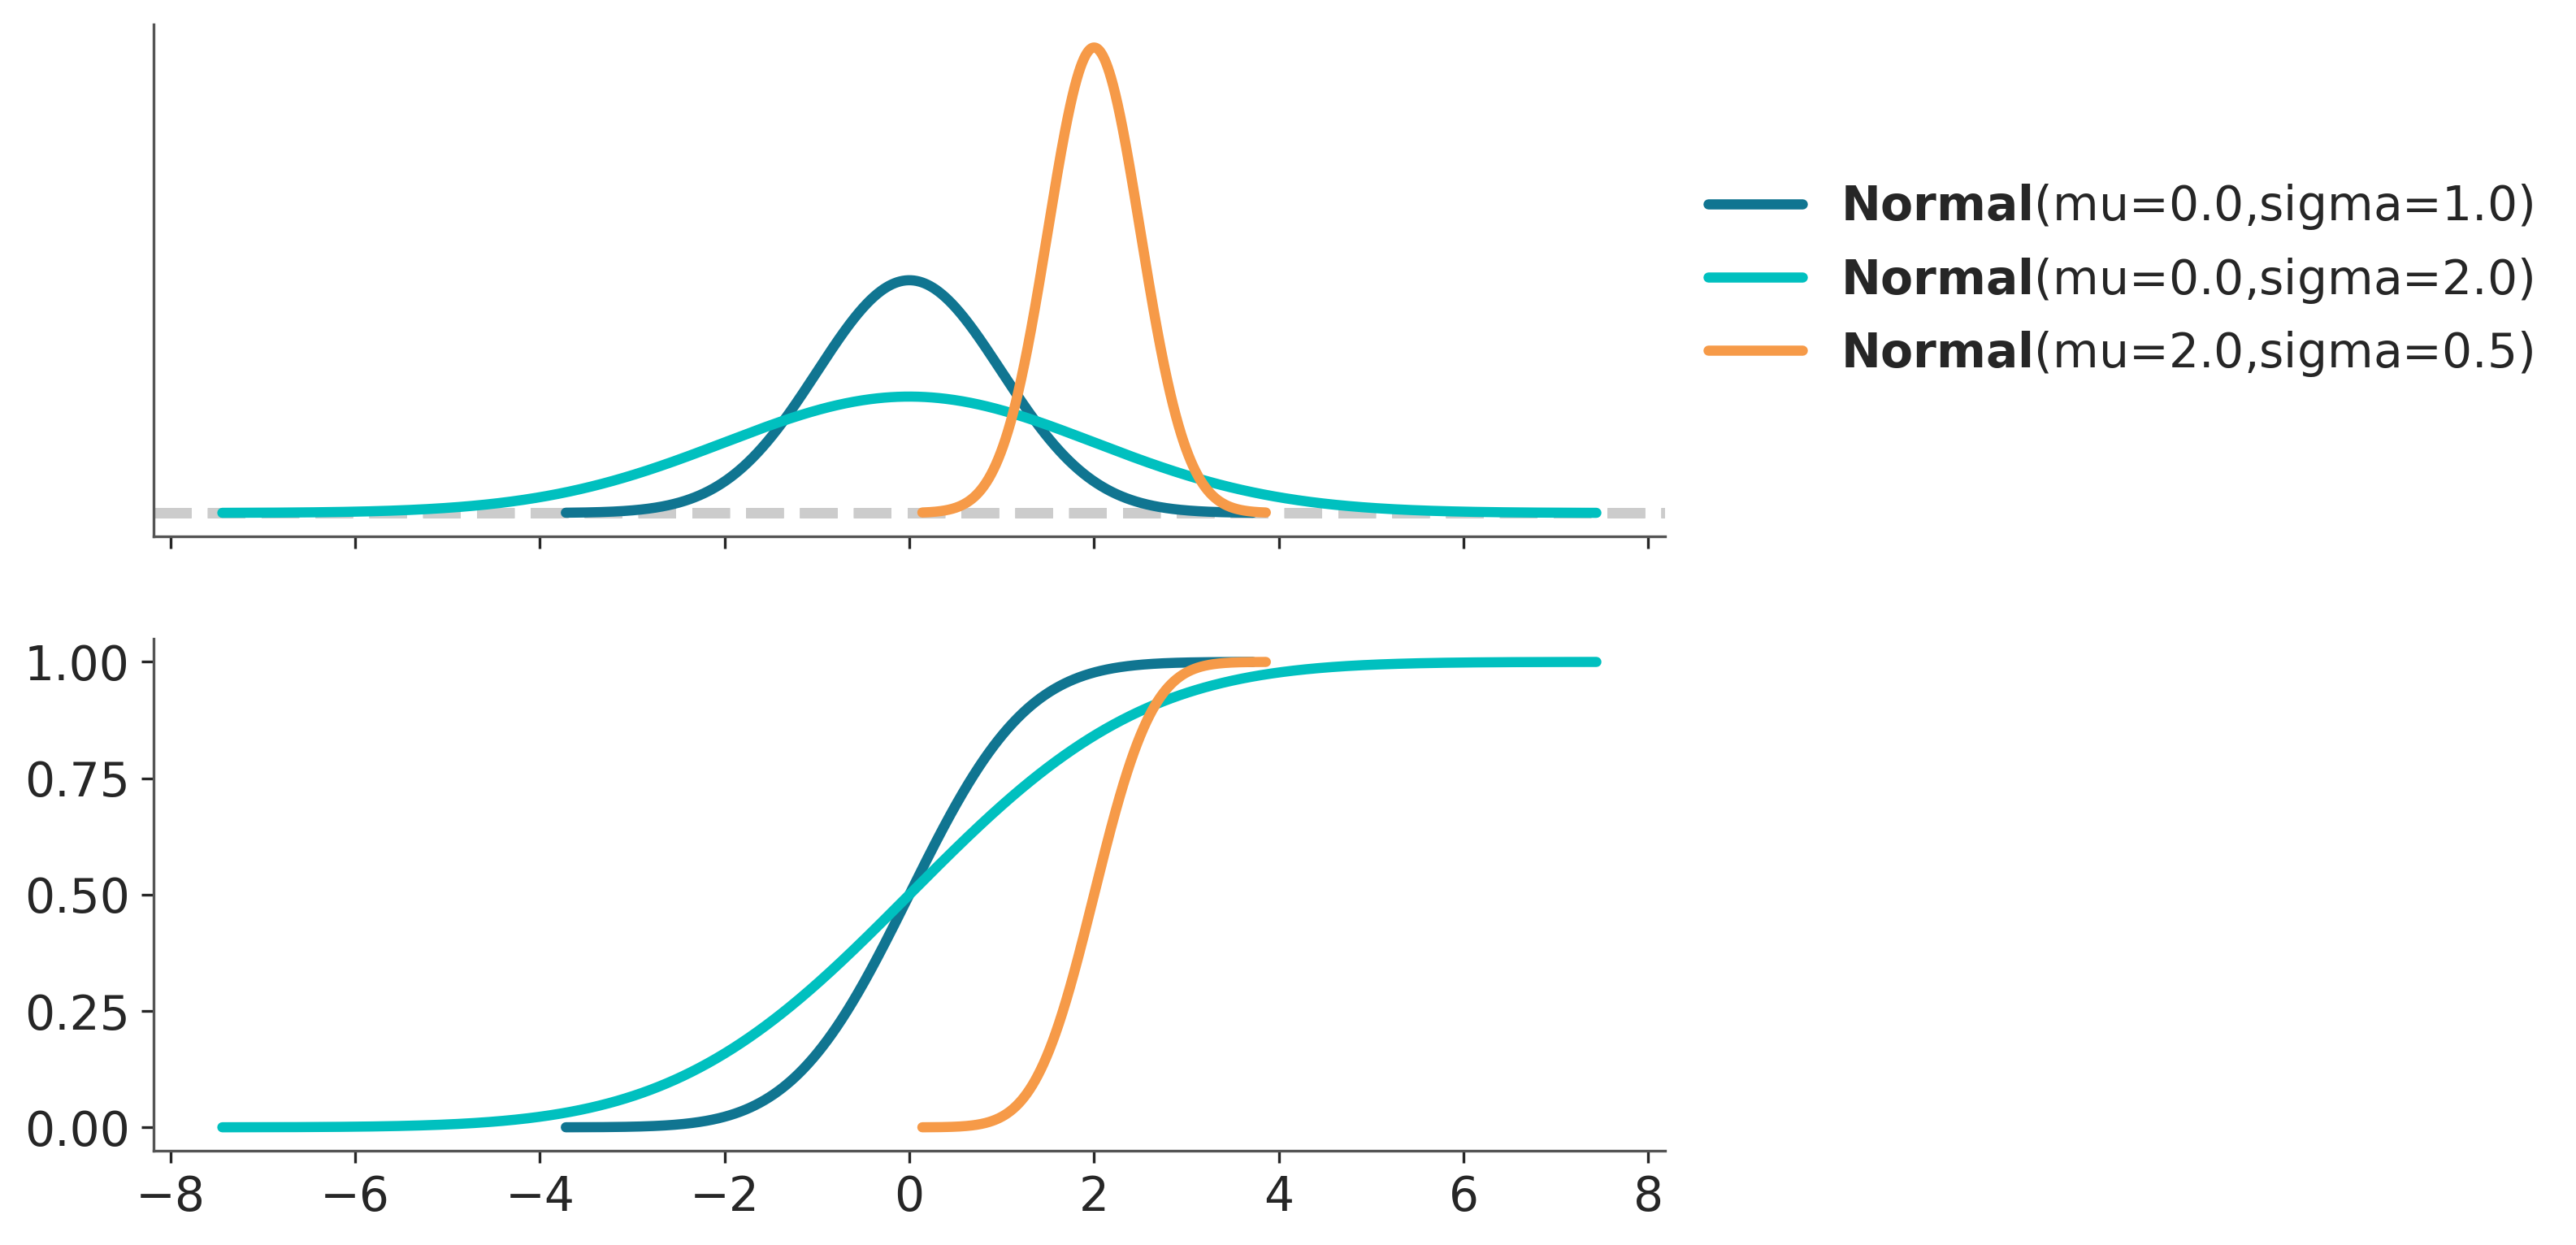

In [31]:
_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., 1.), (0., 2.), (2., .5)]
for val in valores:
    pz.Normal(*val).plot_pdf(ax=ax[0])
    pz.Normal(*val).plot_cdf(ax=ax[1])
    ax[1].get_legend().remove()

## Joint, Conditional and Marginal probabilities
- Joint probability $P(A,B)$
- Marginal probability $P(A)$ or $P(B)$
- Conditional probability $P(A|B)$ or $P(B|A)$
- $P(A,B)$ can be written as $P(A|B)P(B)$
- The marginal probability for $A$ can be written as
  - $P(A) = \sum_{B} P(A,B) = \sum_{B} p(A|B)p(B)$

## Limits

### Law of large numbers
- The average value, calculated for a sample, converges to the expected value of said distribution

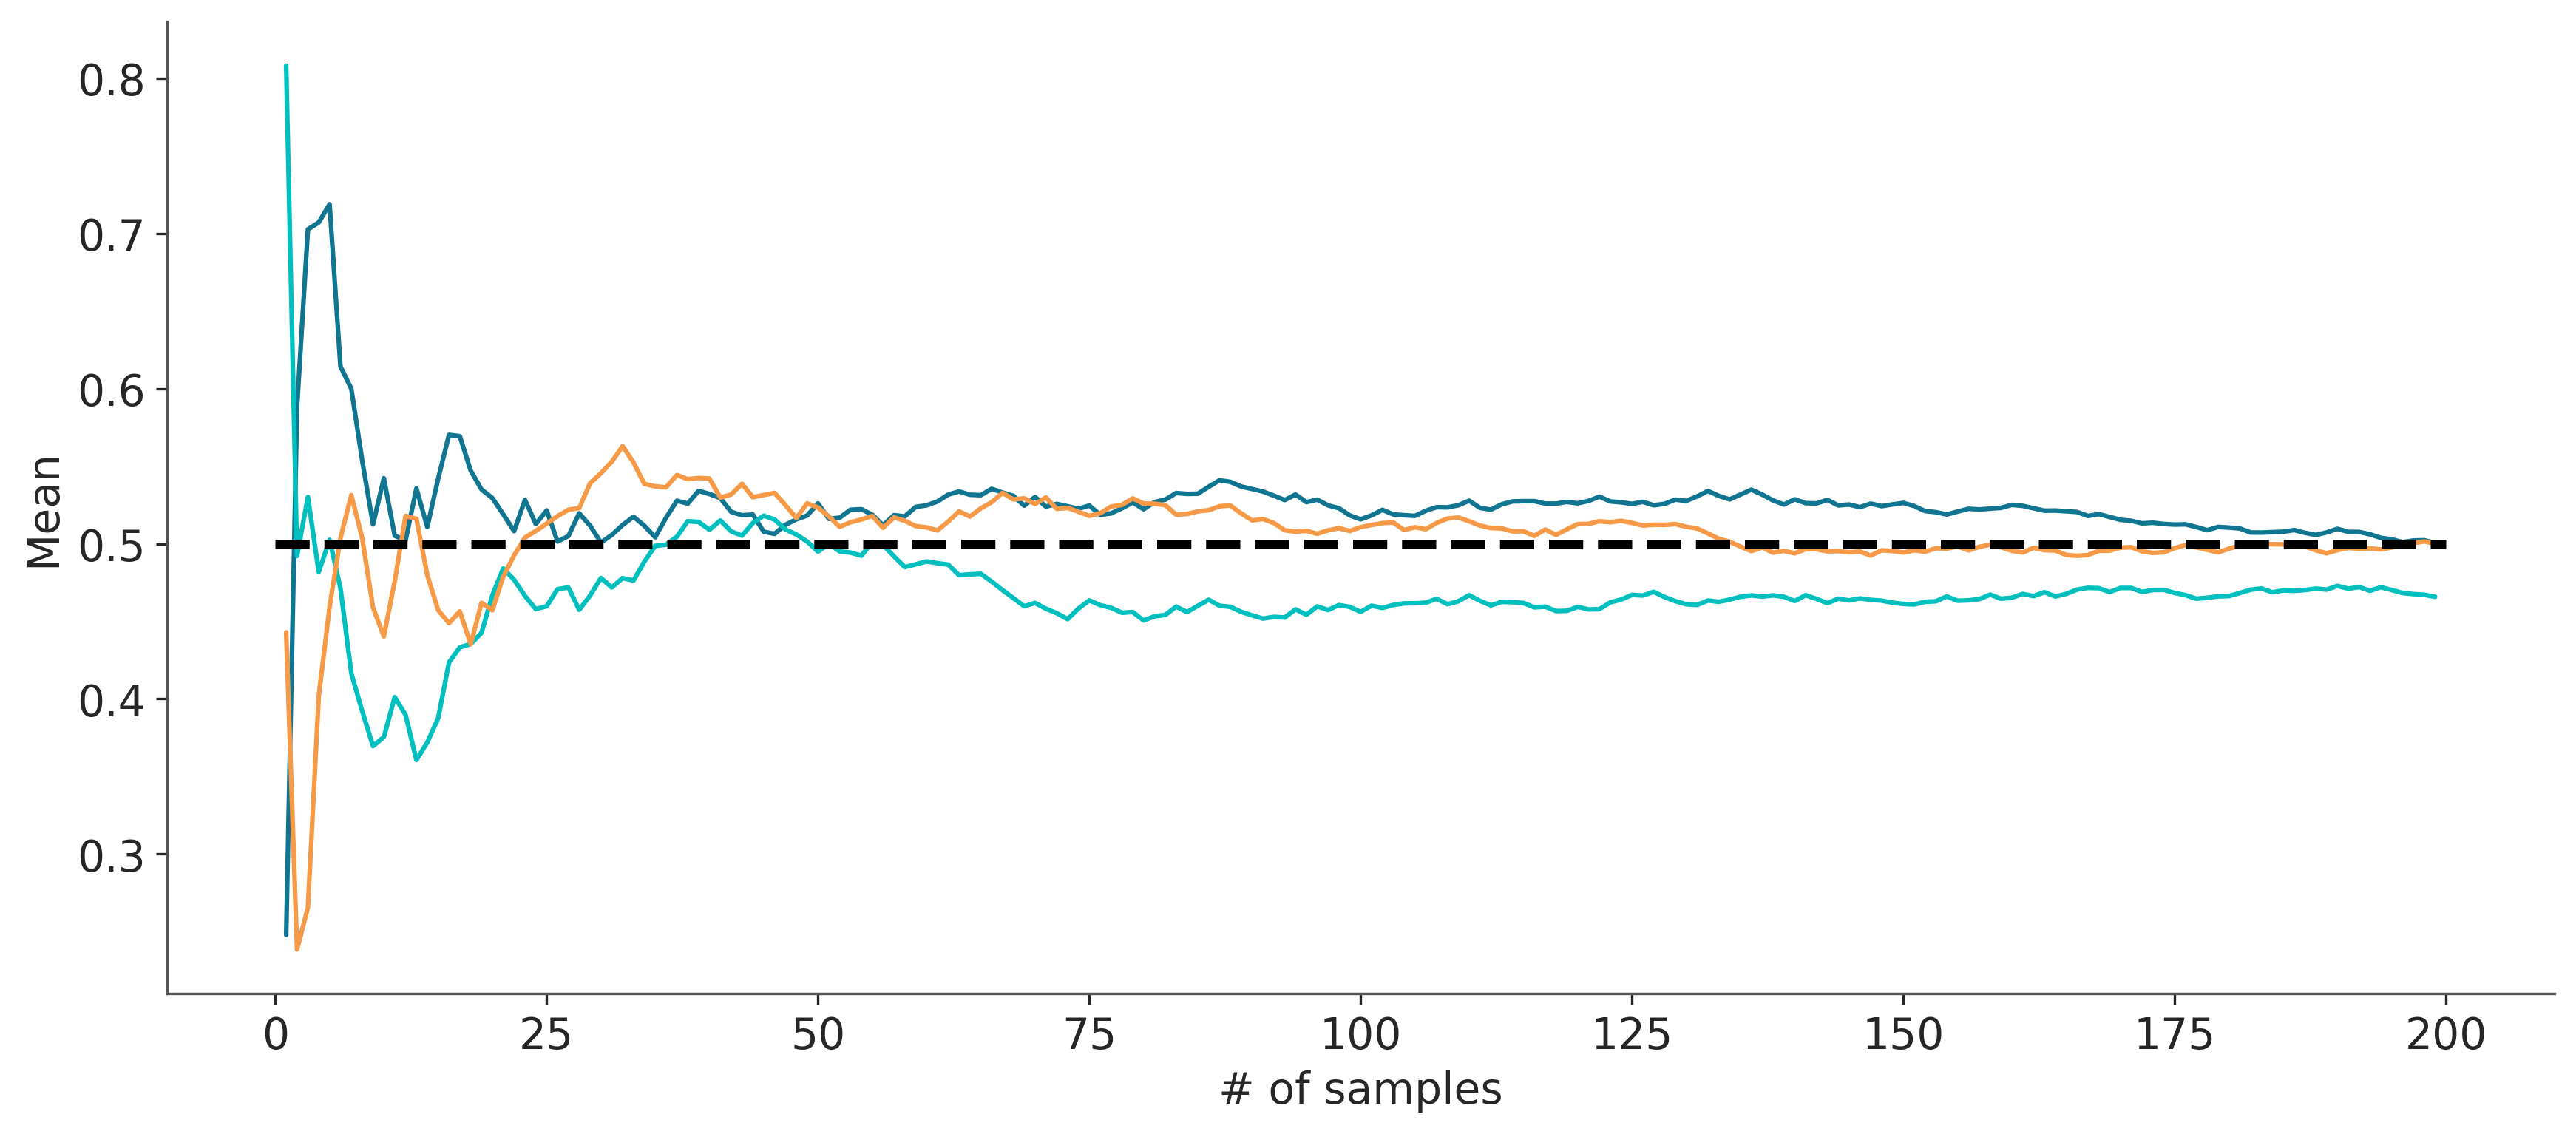

In [33]:
sample_size = 200
samples = range(1, sample_size)
dist = pz.Uniform(0, 1)
true_mean = dist.rv_frozen.stats('m')

for _ in range(3):
    muestra = dist.rvs(sample_size)
    media_estimada = [muestra[:i].mean() for i in samples]
    plt.plot(samples, media_estimada, lw=1.5)

plt.hlines(true_mean, 0, sample_size, linestyle='--', color='k')
plt.ylabel("Mean", fontsize=14)
plt.xlabel("# of samples", fontsize=14);

### Central Limit Theorem
- The sample means will be distributed approximately as Gaussian with $n \rightarrow \infty$
- $\bar{X_{n}} \sim N(\mu, \frac{\sigma^2}{n})$
- To be fulfilled, the following assumptions must be met
  - Sampled independently
  - Comes from the same distribution
  - The mean and standard deviation of the distribution must be finite

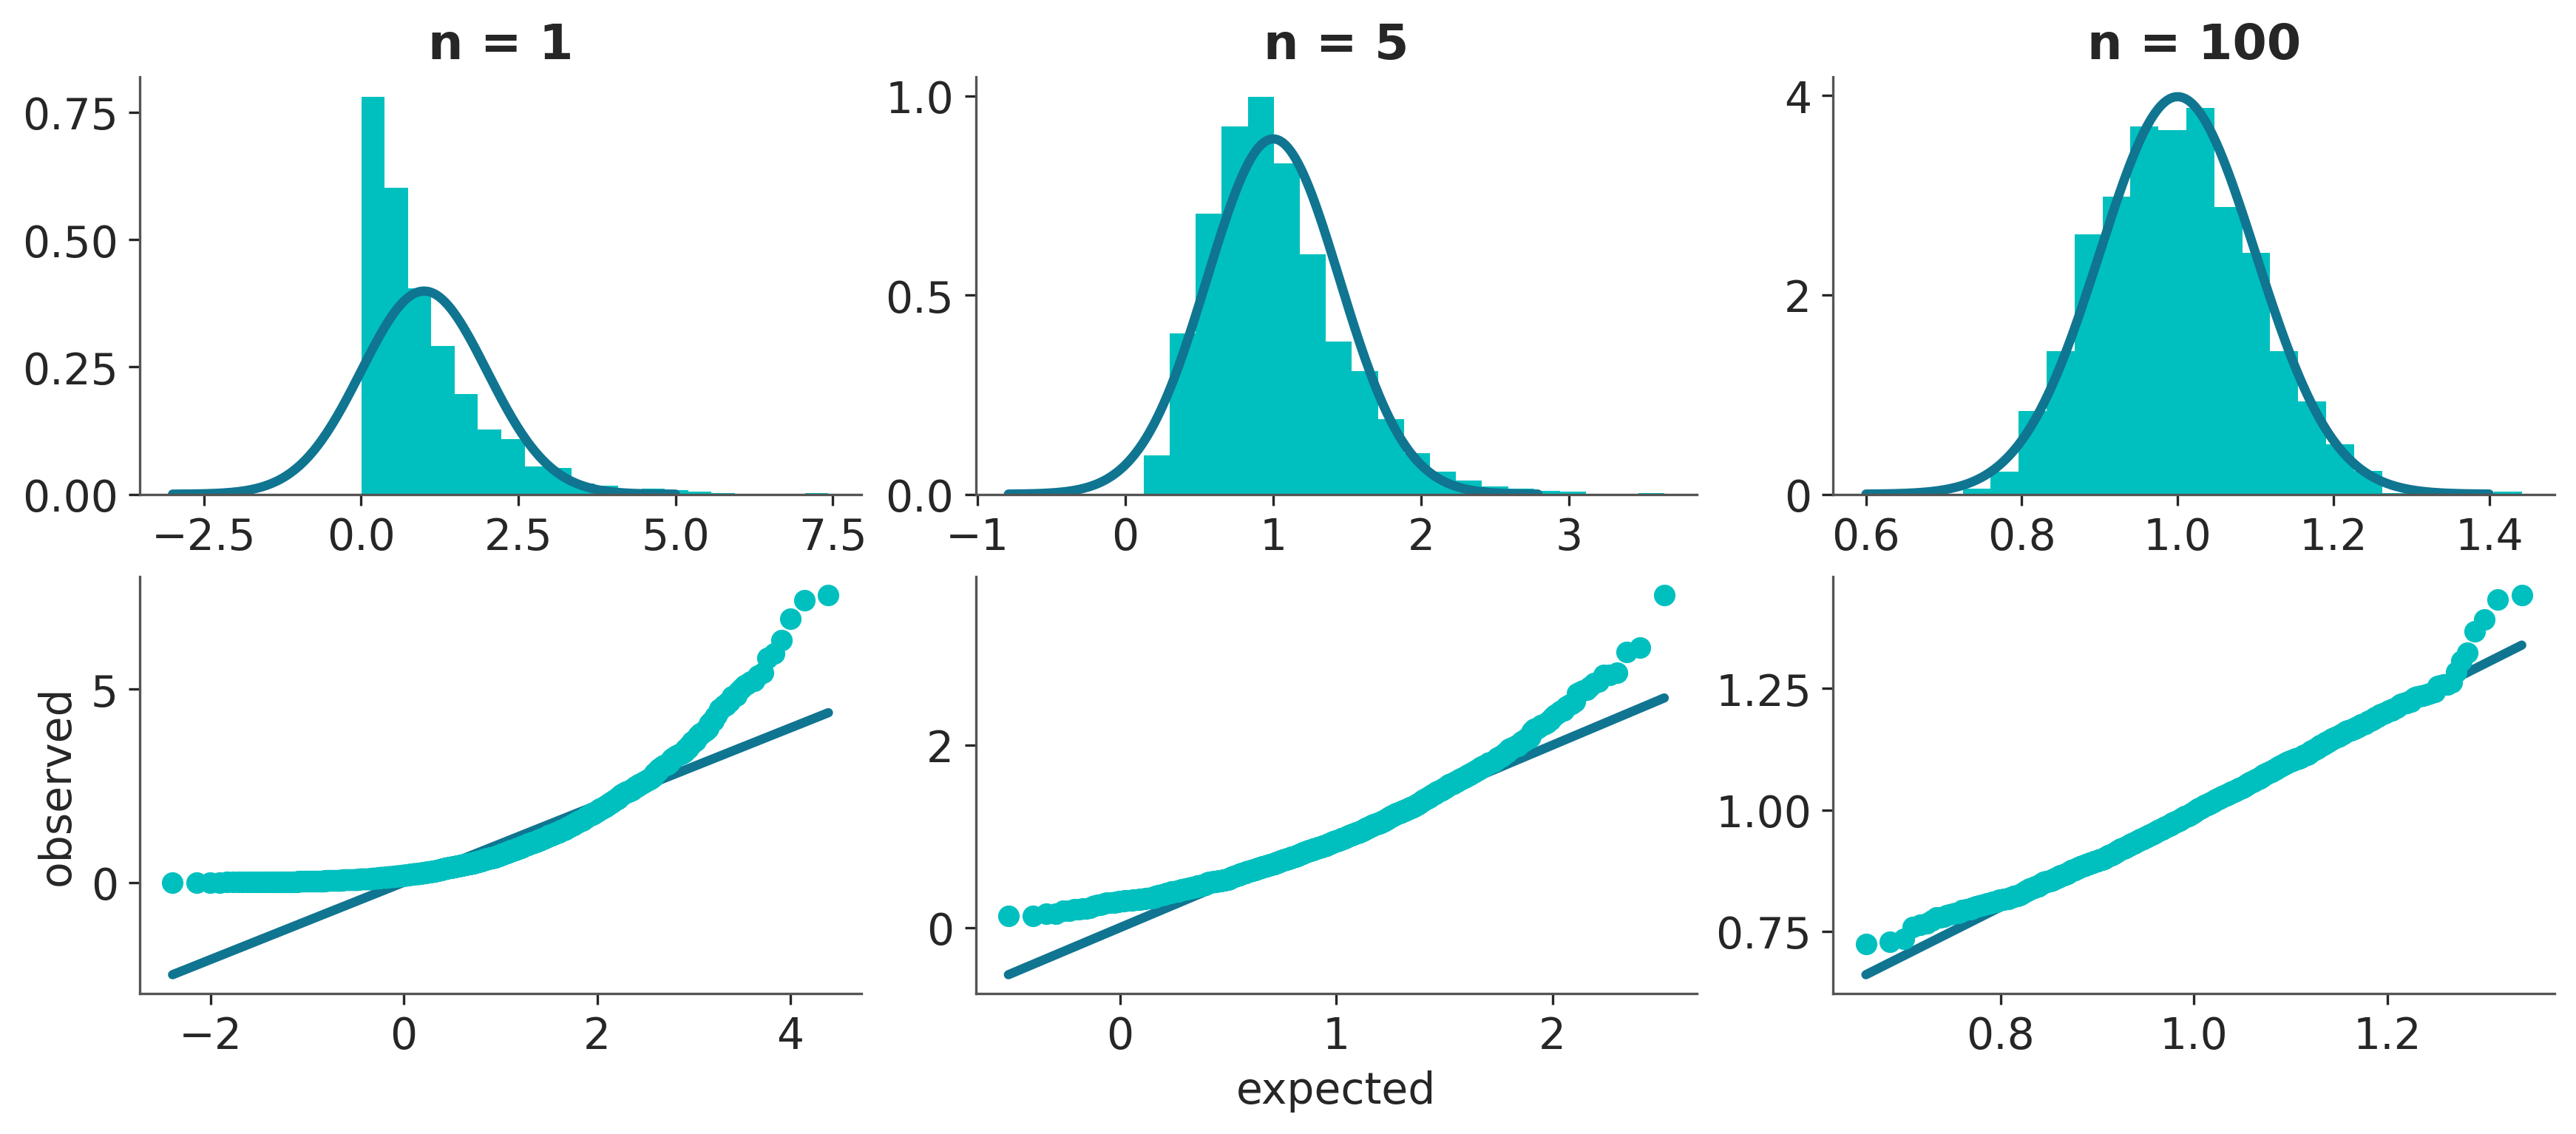

In [35]:
iters = 2000
dist = pz.Exponential(1)
media, var = dist.rv_frozen.stats('mv')

_, ax = plt.subplots(2, 3)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(dist.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, pz.Normal(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=pz.Normal(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observed')
ax[1, 1].set_xlabel('expected');